In [1]:
import utils
import numpy as np
import pandas as pd

import copy
import sxs
import phenom

import prim.hybrid
from prim import spliced_pn
from prim.waveform import Waveform
from prim.waveform_generator import generate_waveform

In [2]:
import logging
logging.getLogger('utils').setLevel('INFO')

In [3]:
import matplotlib.pyplot as plt
import scienceplots
# plt.style.use(['default'])
# plt.style.use(['science', 'notebook', 'bright'])
plt.style.use(['science', 'notebook', 'muted'])

# plt.style.use(['science', 'notebook', 'grid'])

plt.rcParams['text.usetex'] = True

In [4]:
utils.set_lal_data_path()

In [5]:
df = utils.get_aligned_spin_sxs_dataframe()

In [6]:
df.sort_values(by='number_of_orbits')[['reference_mass_ratio_rounded', 'reference_chi_eff_rounded', 'number_of_orbits']]

reference_mass_ratio_rounded  reference_chi_eff_rounded  \
SXS:BBH:1142                         1.250                     -0.000   
SXS:BBH:2361                         3.000                     -0.375   
SXS:BBH:3632                         1.000                      0.000   
SXS:BBH:3633                         1.000                      0.000   
SXS:BBH:3634                         1.000                      0.000   
...                                    ...                        ...   
SXS:BBH:1418                         4.000                     -0.420   
SXS:BBH:0206                         7.001                     -0.350   
SXS:BBH:0204                         7.001                      0.350   
SXS:BBH:1412                         1.630                      0.134   
SXS:BBH:1110                         7.000                      0.000   

              number_of_orbits  
SXS:BBH:1142          9.064578  
SXS:BBH:2361          9.255152  
SXS:BBH:3632          9.499769  
SXS:BBH:3633          9.499828  
SXS:BBH:3634          9.629791  
...                        ...  
SXS:BBH:1418         66.334975  
SXS:BBH:0206         73.164310  
SXS:BBH:0204         88.369299  
SXS:BBH:1412        145.090915  
SXS:BBH:1110        175.661000  

[530 rows x 3 columns]

In [7]:
df[(df['reference_mass_ratio_rounded'] == 1.0)&(df['reference_chi_eff_rounded'] == 0.0)].sort_values(by='number_of_orbits')['number_of_orbits']

SXS:BBH:3632     9.499769
SXS:BBH:3633     9.499828
SXS:BBH:3634     9.629791
SXS:BBH:3864    18.436876
SXS:BBH:0330    18.594715
SXS:BBH:0327    18.602216
SXS:BBH:1476    18.618178
SXS:BBH:0389    18.632497
SXS:BBH:2496    20.854820
SXS:BBH:2085    22.264134
SXS:BBH:2087    22.277184
SXS:BBH:2091    22.620292
SXS:BBH:3977    23.618504
SXS:BBH:2378    27.955793
SXS:BBH:2377    27.957669
SXS:BBH:2375    27.959523
SXS:BBH:2376    27.959775
SXS:BBH:2325    27.964547
SXS:BBH:3624    27.976852
SXS:BBH:2092    28.293934
SXS:BBH:0304    28.985996
SXS:BBH:2326    32.207261
SXS:BBH:3896    38.822016
SXS:BBH:1154    40.651163
Name: number_of_orbits, dtype: float64

Table below gathers all the simulation according to the physical parmaters

In [8]:
df_params = utils.get_simulations_grouped_by_mass_ratio_and_aligned_spin_dataframe()

In [9]:
df_params

reference_mass_ratio_rounded  reference_chi_eff_rounded  \
0                           1.000                     -0.000   
1                           1.000                      0.800   
2                           2.000                      0.000   
3                           1.500                     -0.300   
4                           3.000                      0.675   
..                            ...                        ...   
431                         1.708                     -0.213   
432                         1.660                     -0.137   
433                         1.660                     -0.138   
434                         1.630                      0.134   
435                        19.996                      0.000   

     reference_dimensionless_spin1z_rounded  \
0                                    -0.000   
1                                     0.800   
2                                     0.000   
3                                    -0.500   
4                                     0.700   
..                                      ...   
431                                  -0.788   
432                                   0.199   
433                                   0.199   
434                                   0.400   
435                                   0.000   

     reference_dimensionless_spin2z_rounded  min_orbits  max_orbits  \
0                                    -0.000    9.499769   40.651163   
1                                     0.800   21.289205   42.571229   
2                                    -0.000   15.449956   40.520545   
3                                    -0.000   18.935153   30.525452   
4                                     0.600   21.353963   21.385732   
..                                      ...         ...         ...   
431                                   0.767   17.854067   17.854067   
432                                  -0.696   18.550019   18.550019   
433                                  -0.697   38.977681   38.977681   
434                                  -0.300  145.090915  145.090915   
435                                  -0.000   34.385048   34.385048   

     number_of_sims                                               sims  
0                14  ['SXS:BBH:0389', 'SXS:BBH:1154', 'SXS:BBH:2325...  
1                 5  ['SXS:BBH:0328', 'SXS:BBH:1477', 'SXS:BBH:2104...  
2                 5  ['SXS:BBH:1166', 'SXS:BBH:1167', 'SXS:BBH:1222...  
3                 3   ['SXS:BBH:2335', 'SXS:BBH:2337', 'SXS:BBH:2339']  
4                 3   ['SXS:BBH:1150', 'SXS:BBH:1151', 'SXS:BBH:1152']  
..              ...                                                ...  
431               1                                   ['SXS:BBH:1465']  
432               1                                   ['SXS:BBH:1491']  
433               1                                   ['SXS:BBH:3911']  
434               1                                   ['SXS:BBH:1412']  
435               1                                   ['SXS:BBH:2516']  

[436 rows x 8 columns]

In [10]:
df_params.query('reference_mass_ratio_rounded==1 & reference_chi_eff_rounded==0')

reference_mass_ratio_rounded  reference_chi_eff_rounded  \
0                             1.0                       -0.0   
10                            1.0                        0.0   
291                           1.0                        0.0   
301                           1.0                       -0.0   
303                           1.0                        0.0   
308                           1.0                       -0.0   
310                           1.0                        0.0   
321                           1.0                       -0.0   
329                           1.0                        0.0   

     reference_dimensionless_spin1z_rounded  \
0                                    -0.000   
10                                   -0.800   
291                                   0.950   
301                                  -0.500   
303                                  -0.600   
308                                  -0.801   
310                                  -0.900   
321                                   0.800   
329                                   0.499   

     reference_dimensionless_spin2z_rounded  min_orbits  max_orbits  \
0                                    -0.000    9.499769   40.651163   
10                                    0.800   18.618178   38.822016   
291                                  -0.949   23.618504   23.618504   
301                                   0.500   28.293934   28.293934   
303                                   0.600   22.620292   22.620292   
308                                   0.800   18.594715   18.594715   
310                                   0.900   22.264134   22.264134   
321                                  -0.800   18.602216   18.602216   
329                                  -0.499   28.985996   28.985996   

     number_of_sims                                               sims  
0                14  ['SXS:BBH:0389', 'SXS:BBH:1154', 'SXS:BBH:2325...  
10                3   ['SXS:BBH:1476', 'SXS:BBH:2087', 'SXS:BBH:3896']  
291               1                                   ['SXS:BBH:3977']  
301               1                                   ['SXS:BBH:2092']  
303               1                                   ['SXS:BBH:2091']  
308               1                                   ['SXS:BBH:0330']  
310               1                                   ['SXS:BBH:2085']  
321               1                                   ['SXS:BBH:0327']  
329               1                                   ['SXS:BBH:0304']

In [11]:
df_params.sort_values(by=['reference_chi_eff_rounded','reference_chi_eff_rounded'], ascending=[False, True]).head(30)

reference_mass_ratio_rounded  reference_chi_eff_rounded  \
288                         1.000                      0.998   
242                         1.000                      0.970   
289                         1.000                      0.960   
29                          1.000                      0.950   
390                         1.500                      0.950   
317                         1.000                      0.900   
357                         1.999                      0.900   
112                         2.999                      0.850   
239                         2.000                      0.850   
320                         1.000                      0.850   
290                         1.305                      0.805   
1                           1.000                      0.800   
35                          2.000                      0.800   
204                         4.367                      0.797   
96                          2.259                      0.774   
188                         9.999                      0.773   
28                          1.000                      0.762   
120                         3.160                      0.754   
26                          1.450                      0.734   
130                         2.995                      0.733   
208                         4.000                      0.720   
229                         6.038                      0.707   
195                         5.638                      0.700   
318                         1.000                      0.700   
322                         1.000                      0.700   
393                         1.500                      0.680   
193                         5.839                      0.677   
4                           3.000                      0.675   
13                          1.000                      0.675   
416                         1.750                      0.673   

     reference_dimensionless_spin1z_rounded  \
288                                   0.998   
242                                   0.970   
289                                   0.960   
29                                    0.950   
390                                   0.950   
317                                   0.900   
357                                   0.900   
112                                   0.850   
239                                   0.850   
320                                   0.850   
290                                   0.693   
1                                     0.800   
35                                    0.800   
204                                   0.798   
96                                    0.763   
188                                   0.800   
28                                    0.731   
120                                   0.740   
26                                    0.698   
130                                   0.745   
208                                   0.800   
229                                   0.800   
195                                   0.770   
318                                   0.900   
322                                   0.700   
393                                   0.600   
193                                   0.658   
4                                     0.700   
13                                    0.682   
416                                   0.600   

     reference_dimensionless_spin2z_rounded  min_orbits  max_orbits  \
288                                   0.998   25.728036   25.728036   
242                                   0.970   25.332748   25.332748   
289                                   0.960   25.239755   25.239755   
29                                    0.950   24.395923   25.179289   
390                                   0.949   26.351106   26.351106   
317                                   0.900   24.830741   24.830741   
357                                   0.899   13.451167   13.4511

In [12]:
df_params.sort_values(by='reference_chi_eff_rounded').tail(10)

reference_mass_ratio_rounded  reference_chi_eff_rounded  \
320                         1.000                      0.850   
239                         2.000                      0.850   
112                         2.999                      0.850   
317                         1.000                      0.900   
357                         1.999                      0.900   
29                          1.000                      0.950   
390                         1.500                      0.950   
289                         1.000                      0.960   
242                         1.000                      0.970   
288                         1.000                      0.998   

     reference_dimensionless_spin1z_rounded  \
320                                   0.850   
239                                   0.850   
112                                   0.850   
317                                   0.900   
357                                   0.900   
29                                    0.950   
390                                   0.950   
289                                   0.960   
242                                   0.970   
288                                   0.998   

     reference_dimensionless_spin2z_rounded  min_orbits  max_orbits  \
320                                   0.850   24.431267   24.431267   
239                                   0.850   24.788509   24.788509   
112                                   0.849   25.649536   25.649536   
317                                   0.900   24.830741   24.830741   
357                                   0.899   13.451167   13.451167   
29                                    0.950   24.395923   25.179289   
390                                   0.949   26.351106   26.351106   
289                                   0.960   25.239755   25.239755   
242                                   0.970   25.332748   25.332748   
288                                   0.998   25.728036   25.728036   

     number_of_sims                              sims  
320               1                  ['SXS:BBH:2423']  
239               1                  ['SXS:BBH:2131']  
112               1                  ['SXS:BBH:0293']  
317               1                  ['SXS:BBH:0160']  
357               1                  ['SXS:BBH:0619']  
29                2  ['SXS:BBH:3627', 'SXS:BBH:3978']  
390               1                  ['SXS:BBH:1146']  
289               1                  ['SXS:BBH:0176']  
242               1                  ['SXS:BBH:3628']  
288               1                  ['SXS:BBH:1124']

In [13]:
df_params.query('reference_mass_ratio_rounded == 5').sort_values(by='reference_chi_eff_rounded')

reference_mass_ratio_rounded  reference_chi_eff_rounded  \
201                           5.0                     -0.750   
38                            5.0                     -0.000   
200                           5.0                      0.250   
199                           5.0                      0.417   
198                           5.0                      0.500   

     reference_dimensionless_spin1z_rounded  \
201                                   -0.90   
38                                    -0.00   
200                                    0.25   
199                                    0.50   
198                                    0.50   

     reference_dimensionless_spin2z_rounded  min_orbits  max_orbits  \
201                                   -0.00   49.878623   49.878623   
38                                     0.00   28.811753   29.131210   
200                                    0.25   20.514921   20.514921   
199                                    0.00   24.192781   24.192781   
198                                    0.50   21.127241   21.127241   

     number_of_sims                              sims  
201               1                  ['SXS:BBH:0208']  
38                2  ['SXS:BBH:2487', 'SXS:BBH:3619']  
200               1                  ['SXS:BBH:2504']  
199               1                  ['SXS:BBH:2385']  
198               1                  ['SXS:BBH:2508']

In [14]:
df_params.iloc[0]['sims']

"['SXS:BBH:0389', 'SXS:BBH:1154', 'SXS:BBH:2325', 'SXS:BBH:2326', 'SXS:BBH:2375', 'SXS:BBH:2376', 'SXS:BBH:2377', 'SXS:BBH:2378', 'SXS:BBH:2496', 'SXS:BBH:3624', 'SXS:BBH:3632', 'SXS:BBH:3633', 'SXS:BBH:3634', 'SXS:BBH:3864']"

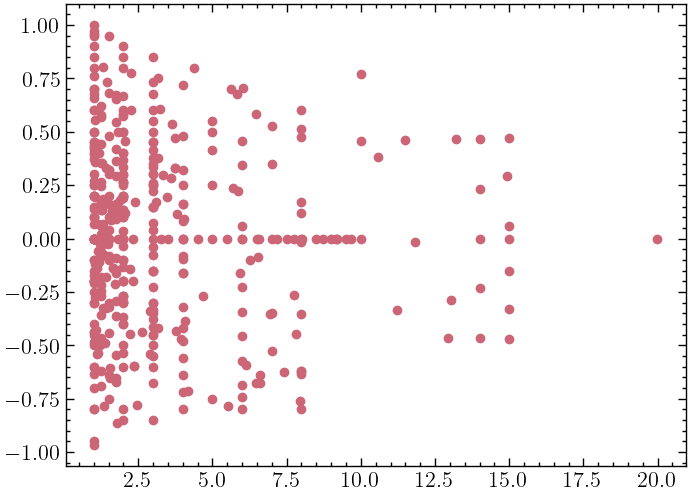

In [15]:
plt.figure()
plt.scatter(df_params['reference_mass_ratio_rounded'], df_params['reference_chi_eff_rounded'])

In [16]:
# sxs_sim_name = 'SXS:BBH:1154' # long q1
# sxs_sim_name = 'SXS:BBH:3632' # short q1

# sxs_sim_name = 'SXS:BBH:0389'
# sxs_sim_name = 'SXS:BBH:3864' # q1 non-spinning, 6 Levs
# sxs_sim_name = 'SXS:BBH:2516' # q20

# sxs_sim_name = 'SXS:BBH:2423'
# sxs_sim_name = 'SXS:BBH:2515'


# sxs_sim_name = 'SXS:BBH:1124' # q1 high aligned spin
# sxs_sim_name = 'SXS:BBH:1137' # q1 low aligned spin

# sxs_sim_name = 'SXS:BBH:2014' # q4 high spin
# sxs_sim_name = 'SXS:BBH:2040' # q4 low spin




# sxs_sim_name = 'SXS:BBH:2492'

# sxs_sim_name = 'SXS:BBH:2325'

# sxs_sim_name = 'SXS:BBH:0293'

# sxs_sim_name = 'SXS:BBH:0206'
# sxs_sim_name = 'SXS:BBH:0355'
# sxs_sim_name = 'SXS:BBH:2014' #q4 aligned spin - only one lev

# sxs_sim_name = 'SXS:BBH:2325'

# sxs_sim_name = 'SXS:BBH:2498'

# sxs_sim_name = 'SXS:BBH:2464' # q15 high spin
# sxs_sim_name = 'SXS:BBH:2463' # q15 low spin

# sxs_sim_name = 'SXS:BBH:0208' # q5 low spin


sxs_sim_name = 'SXS:BBH:1412' # 2nd longest sim

In [17]:
df.loc[[sxs_sim_name]]

deprecated  reference_time  reference_mass_ratio  \
SXS:BBH:1412       False           400.0              1.629975   

                                  reference_dimensionless_spin1  \
SXS:BBH:1412  [-1.9725445813e-09, -3.88547464063e-08, 0.4000...   

              reference_dimensionless_spin1_mag  \
SXS:BBH:1412                           0.400006   

                                  reference_dimensionless_spin2  \
SXS:BBH:1412  [-3.80164646712e-09, 1.86541359438e-09, -0.299...   

              reference_dimensionless_spin2_mag  reference_chi_eff  \
SXS:BBH:1412                           0.299984           0.133848   

              reference_chi1_perp  reference_chi2_perp  ...  \
SXS:BBH:1412         3.472334e-08         4.660246e-09  ...   

                    date_link_earliest         date_run_earliest  \
SXS:BBH:1412 2017-06-28 00:47:22+00:00 1970-01-01 00:00:00+00:00   

                       date_run_latest       date_postprocessing  \
SXS:BBH:1412 1970-01-01 00:00:00+00:00 2019-04-03 18:27:25+00:00   

              reference_mass_ratio_rounded  reference_chi_eff_rounded  \
SXS:BBH:1412                          1.63                      0.134   

             reference_dimensionless_spin1z reference_dimensionless_spin2z  \
SXS:BBH:1412                       0.400006                      -0.299984   

              reference_dimensionless_spin1z_rounded  \
SXS:BBH:1412                                     0.4   

              reference_dimensionless_spin2z_rounded  
SXS:BBH:1412                                    -0.3  

[1 rows x 65 columns]

In [18]:
df.loc[[sxs_sim_name]][['reference_mass_ratio', 'reference_dimensionless_spin1z', 'reference_dimensionless_spin2z', 'number_of_orbits']].values[0]

array([  1.62997469,   0.40000608,  -0.29998355, 145.09091545])

In [19]:
q, chi1, chi2, chi_eff, number_of_orbits = df.loc[[sxs_sim_name]][['reference_mass_ratio', 'reference_dimensionless_spin1z', 'reference_dimensionless_spin2z', 'reference_chi_eff_rounded','number_of_orbits']].values[0]

In [20]:
q, chi1, chi2, chi_eff, number_of_orbits

(1.629974689500553, 0.400006079655, -0.299983545203, 0.134, 145.090915445)

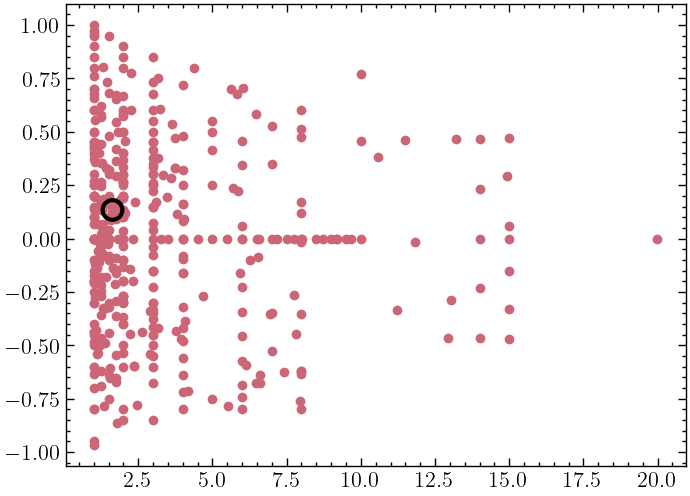

In [21]:
plt.figure()
plt.scatter(df_params['reference_mass_ratio_rounded'], df_params['reference_chi_eff_rounded'])
plt.scatter(q, chi_eff, ec='k', fc='none', s=200, lw=3)

In [22]:
all_modes = [(2,2), (2,1), (3,3), (3,2), (4,4), (4,3), (5,5), (5,4)]
modes_equal_mass_equal_spin = [(2,2), (3,2), (4,4), (5,4)]
if (np.around(q, 2) == 1) & (np.around(chi1, 3) == np.around(chi2, 3)):
    modes = modes_equal_mass_equal_spin
else:
    modes = all_modes

In [23]:
modes

[(2, 2), (2, 1), (3, 3), (3, 2), (4, 4), (4, 3), (5, 5), (5, 4)]

In [24]:
approximants = [
    "SEOBNRv5HM",
    # "SEOBNRv4HM_PA",
    # "IMRPhenomTHM",
    # "NRHybSur3dq8",
    # "SpinTaylorT4",
    "SpinTaylorT1",
]

In [25]:
coarse_grid_params = {"on": True, "t0": -300, "t1": 300, "N": 5000}
# coarse_grid_params = {"on": True, "t0": -300, "t1": 300, "N": 10000}
# coarse_grid_params = {"on": True, "t0": -100, "t1": 100, "N": 1000}

In [26]:
import prim.taylort3

In [27]:
# This corresponds to a bit before the first collocation point in terms of theta [inspiral-collocation-points-paper-plot.ipynb]
# Edit: I don't think we need to build such long hybrids to build a good inspiral model

# proposed_start_theta = 0.45
# proposed_start_theta = 0.42
# proposed_start_theta = 0.40 # have been using this one as nominal value
# proposed_start_theta = 0.47
# proposed_start_theta = 0.39
# proposed_start_theta = 0.38
# proposed_start_theta = 0.33
proposed_start_theta = 0.325
# proposed_start_theta = 0.28
time_at_theta = prim.taylort3.TaylorT3_t(proposed_start_theta, 0, phenom.eta_from_q(q), 1)
time_at_theta


hybrid_start_freq_Mf = prim.taylort3.TaylorT3_Omega_GW(time_at_theta, 0, phenom.eta_from_q(q), 1, chi1, chi2)/2/np.pi
# hybrid_start_freq_Mf = 0.0047

M = 20
hybrid_start_freq_Hz = np.around(phenom.MftoHz(hybrid_start_freq_Mf, M), 3)
hybrid_start_freq_Hz

print(f"{time_at_theta = } M")
print(f"{hybrid_start_freq_Mf = } Mf")
print(f"{hybrid_start_freq_Hz = } Hz")

time_at_theta = -170461.14200934002 M
hybrid_start_freq_Mf = 0.0013770101640339773 Mf
hybrid_start_freq_Hz = 13.978 Hz


In [28]:
%%time
wf_hybrids, metadata_hybrids = utils.build_hybrids(
    sxs_sim_name,
    approximants=approximants,
    hybrid_start_freq_Hz=hybrid_start_freq_Hz,
    modes=modes,
    deltaT_approximant=1/4096/2,
    n_cycles_before_window=4,
    n_cycles_in_window=8,
    n_tries=10,
    M=M,
    coarse_grid_params = coarse_grid_params,
    # n_cycles_before_align_window=20,
    # n_cycles_in_align_window=100,
    n_cycles_before_align_window=10,
    n_cycles_in_align_window=20,
    # n_cycles_before_align_window=150,
    # n_cycles_in_align_window=200,
)

2024-11-05 08:25:13,398 - INFO - start
2024-11-05 08:25:13,399 - INFO - getting sxs data


Simulation_v2("SXS:BBH:1412v2.0/Lev1")
# n_orbits=145 q=1.63 chi1=[-1.97e-09, -3.89e-08, 0.4] chi2=[-3.8e-09, 1.87e-09, -0.3] e=0.000445 simulation
Simulation_v2("SXS:BBH:1412v2.0/Lev2")
# n_orbits=145 q=1.63 chi1=[-1.97e-09, -3.89e-08, 0.4] chi2=[-3.8e-09, 1.87e-09, -0.3] e=0.000445 simulation
Simulation_v2("SXS:BBH:1412v2.0/Lev3")
# n_orbits=145 q=1.63 chi1=[-1.97e-09, -3.89e-08, 0.4] chi2=[-3.8e-09, 1.87e-09, -0.3] e=0.000445 simulation


2024-11-05 08:25:26,930 - INFO - number_of_nr_levs_found = 1
2024-11-05 08:25:26,931 - INFO - levs_found = ['SXS:BBH:1412/Lev3']
2024-11-05 08:25:26,931 - INFO - Only one Lev found. Therefore, there are no 'non_reference_sims'
2024-11-05 08:25:26,931 - INFO - determining reference simulation
2024-11-05 08:25:26,932 - INFO - reference_sim = 'SXS:BBH:1412/Lev3'
2024-11-05 08:25:26,932 - INFO - non_reference_sims = []
2024-11-05 08:25:26,932 - INFO - converting sxs to prim
2024-11-05 08:25:27,111 - INFO - Looping over NR sims
2024-11-05 08:25:27,112 - INFO - working: SXS:BBH:1412/Lev3
2024-11-05 08:25:27,112 - INFO - start NR time: -115306.72984645779 M
2024-11-05 08:25:27,112 - INFO - end NR time: 1235.897475243386 M
2024-11-05 08:25:27,112 - INFO - preparing to hybridise
2024-11-05 08:25:27,112 - INFO - computing NR start 2,2 frequency
2024-11-05 08:25:27,113 - INFO - NR_start_frequency = 15.68 Hz (Total Mass = 20)
2024-11-05 08:25:27,113 - INFO - NR_start_frequency_Mf = 0.0015446339856

CPU times: user 2min 39s, sys: 5.26 s, total: 2min 44s
Wall time: 2min 49s


In [29]:
wf_hybrids

{'SXS:BBH:1412/Lev3__SEOBNRv5HM': <prim.waveform.Waveform at 0x17fa17130>,
 'SXS:BBH:1412/Lev3__SpinTaylorT1': <prim.waveform.Waveform at 0x17fa14b50>}

In [30]:
metadata_hybrids

{'reference_hybrid': 'SXS:BBH:1412/Lev3__SEOBNRv5HM',
 'other_hybrids': ['SXS:BBH:1412/Lev3__SpinTaylorT1'],
 'hybrids_metadatas': {'SXS:BBH:1412/Lev3__SEOBNRv5HM': {'results': <lmfit.model.ModelResult at 0x17f96eef0>,
   'win1': -112805.20017666502,
   'win2': -107864.72388072661,
   'sxs_sim_name': 'SXS:BBH:1412/Lev3',
   'approximant': 'SEOBNRv5HM',
   'sxs_metadata': Simulation_v2("SXS:BBH:1412v2.0/Lev3")
   # n_orbits=145 q=1.63 chi1=[-1.97e-09, -3.89e-08, 0.4] chi2=[-3.8e-09, 1.87e-09, -0.3] e=0.000445 simulation,
   'q': 1.629974689500553,
   'chi1z': 0.400006079655,
   'chi2z': -0.299983545203},
  'SXS:BBH:1412/Lev3__SpinTaylorT1': {'results': <lmfit.model.ModelResult at 0x17f9a4ac0>,
   'win1': -112805.20017666502,
   'win2': -107864.72388072661,
   'sxs_sim_name': 'SXS:BBH:1412/Lev3',
   'approximant': 'SpinTaylorT1',
   'sxs_metadata': Simulation_v2("SXS:BBH:1412v2.0/Lev3")
   # n_orbits=145 q=1.63 chi1=[-1.97e-09, -3.89e-08, 0.4] chi2=[-3.8e-09, 1.87e-09, -0.3] e=0.000445 s

difference in peak of waveform

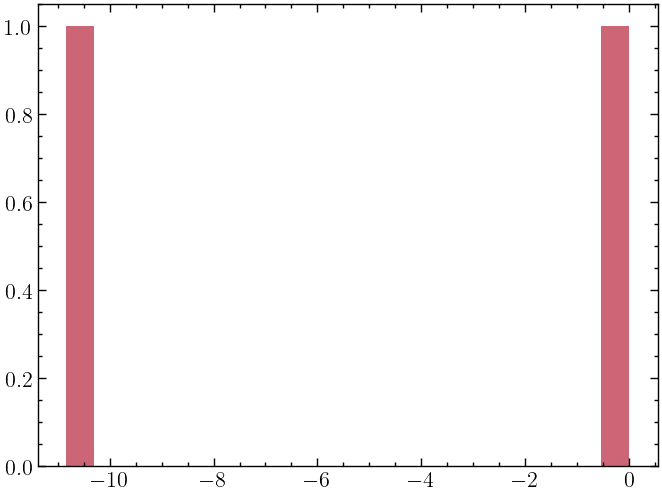

In [31]:
plt.hist([wf_hybrids[k].compute_time_of_peak()[0] for k in wf_hybrids.keys()], bins=20);

In [32]:
pd.DataFrame({'time_of_peak':[wf_hybrids[k].compute_time_of_peak()[0] for k in wf_hybrids.keys()]}, index=wf_hybrids.keys())

time_of_peak
SXS:BBH:1412/Lev3__SEOBNRv5HM        0.000000
SXS:BBH:1412/Lev3__SpinTaylorT1    -10.842728

In [33]:
hyb_win1 = metadata_hybrids['hybrids_metadatas'][metadata_hybrids['reference_hybrid']]['win1']
hyb_win2 = metadata_hybrids['hybrids_metadatas'][metadata_hybrids['reference_hybrid']]['win2']

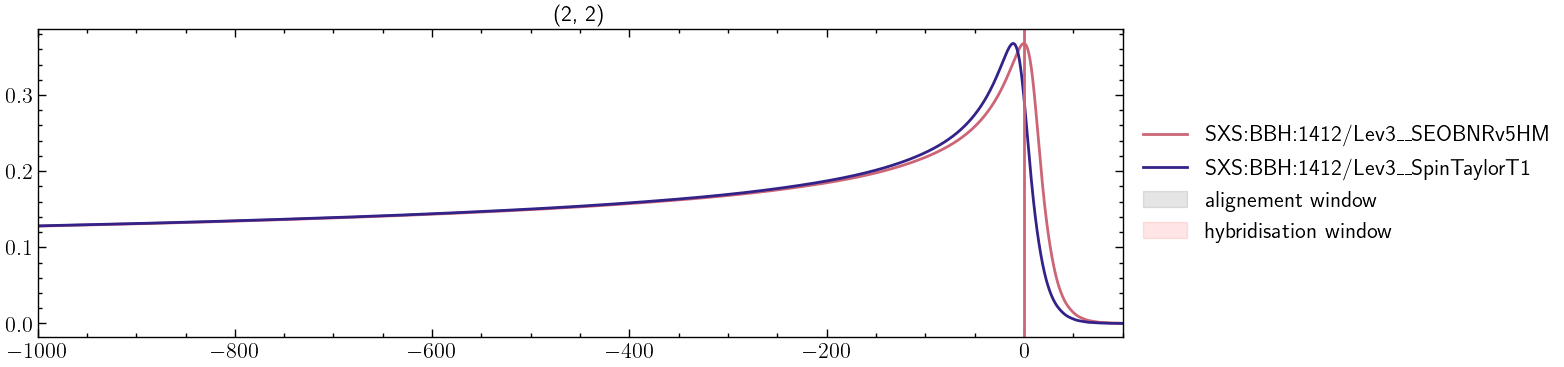

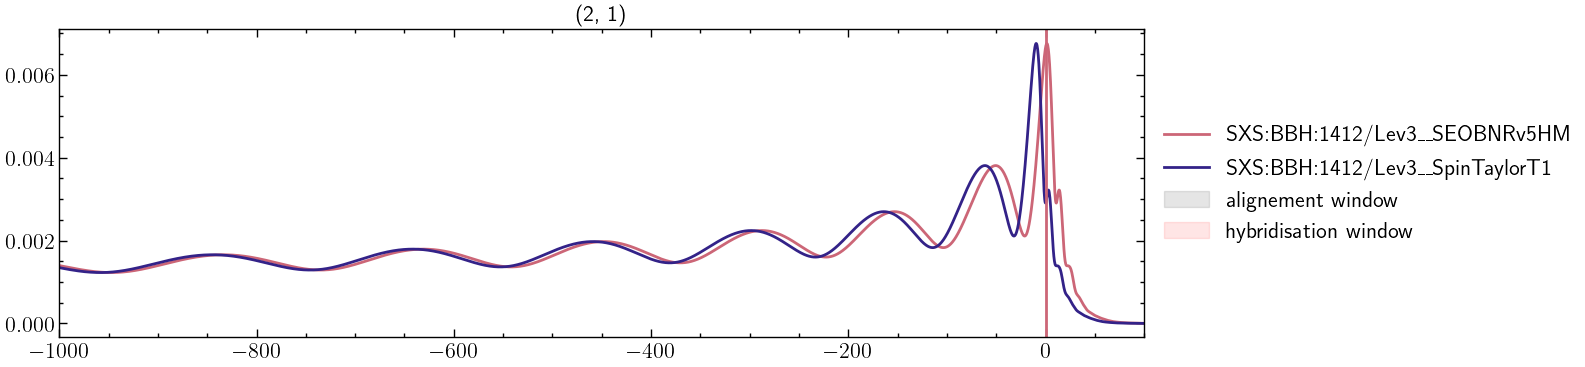

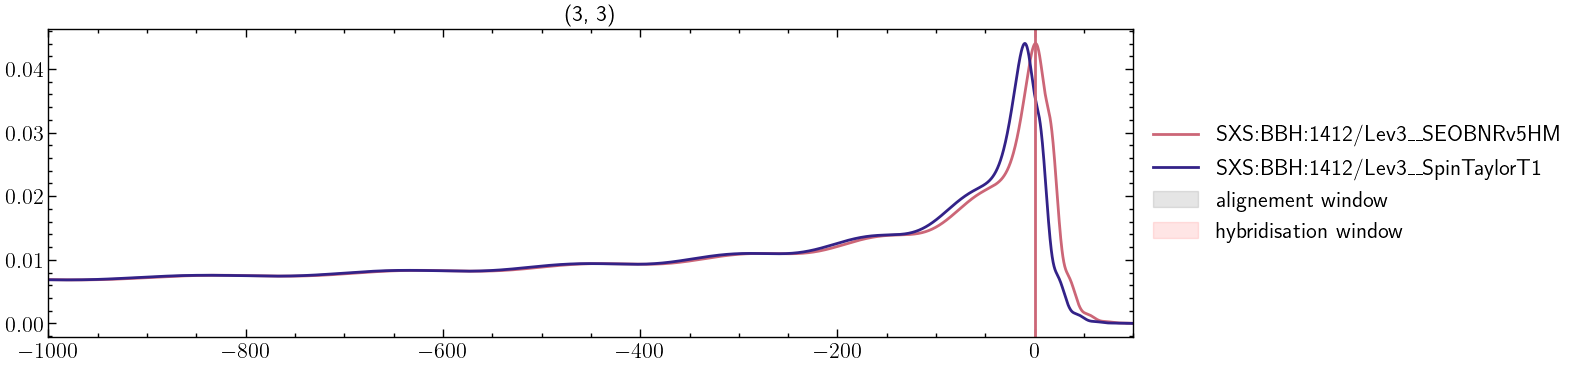

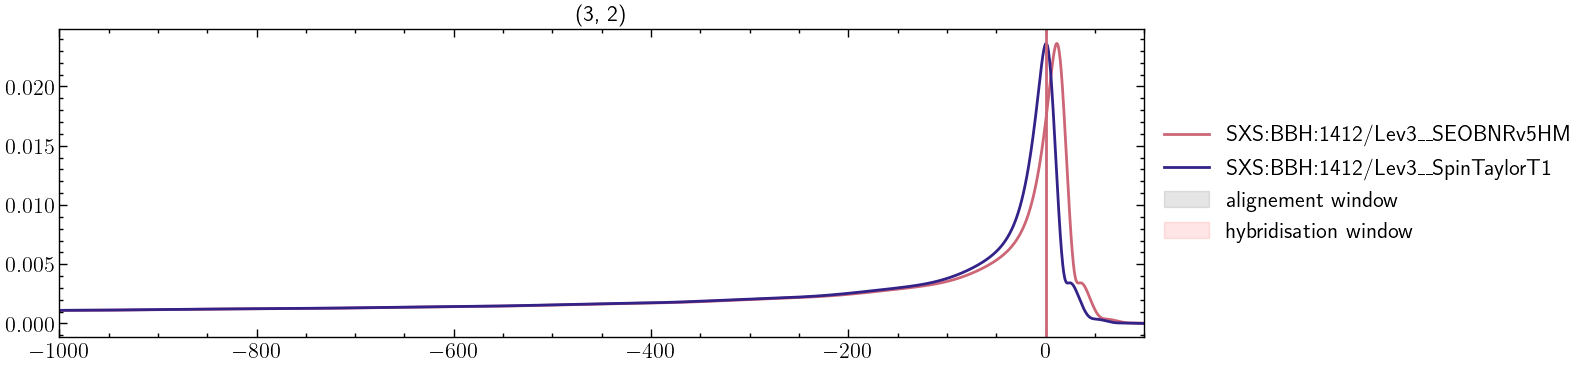

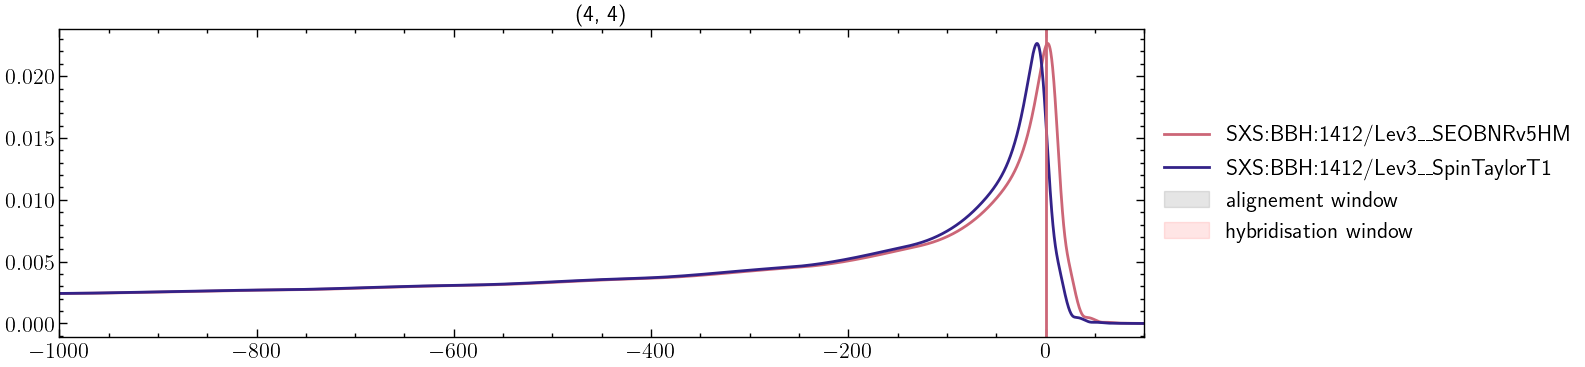

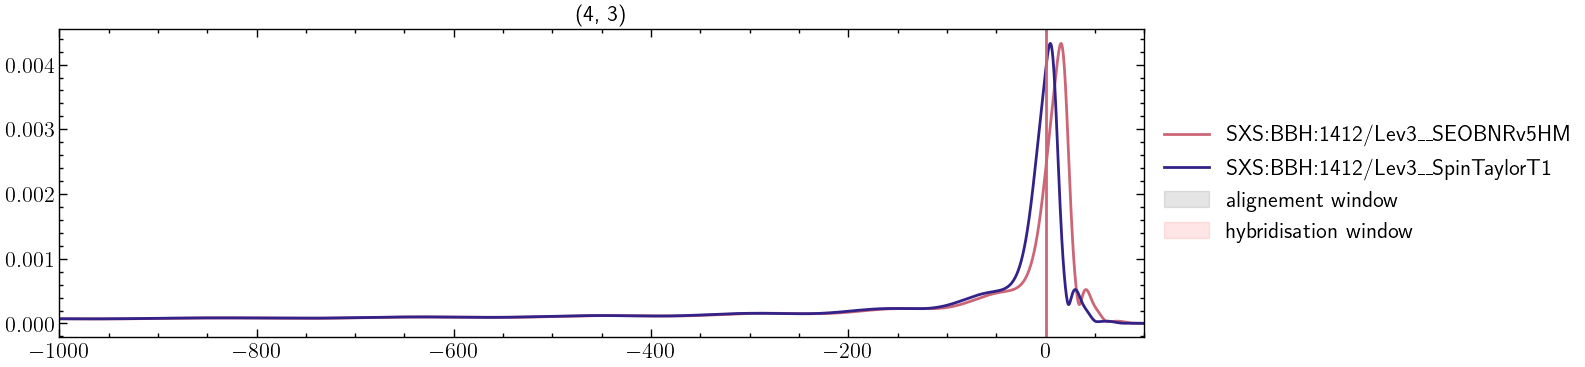

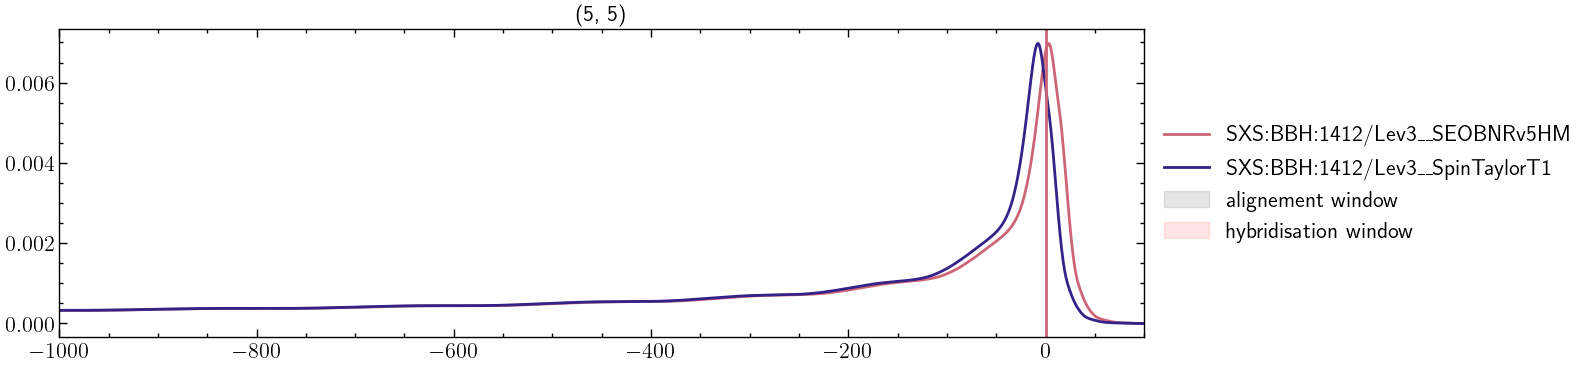

In [34]:
for mode in modes:
    plt.figure(figsize=(14, 4))
    for k in np.sort(list(wf_hybrids.keys())):
        x_plot = wf_hybrids[k].times
        y_plot = wf_hybrids[k].amplitudes[mode].real
        if 'THM' in k:
            ls='--'
        else:
            ls='-'
        plt.plot(x_plot, y_plot, label=f'{k}', ls=ls)
    # plt.xlim(-100, 100)
    plt.xlim(-1000, 100)
    # plt.xlim(-5000, 100)
    # plt.ylim(-1800, -1600)
    plt.axvline(0)
    plt.axvspan(metadata_hybrids['alignement_window']['win1'], metadata_hybrids['alignement_window']['win2'], color="k", alpha=0.1, label="alignement window")
    plt.axvspan(hyb_win1, hyb_win2, color="r", alpha=0.1, label="hybridisation window")
    plt.title(mode)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    plt.close()

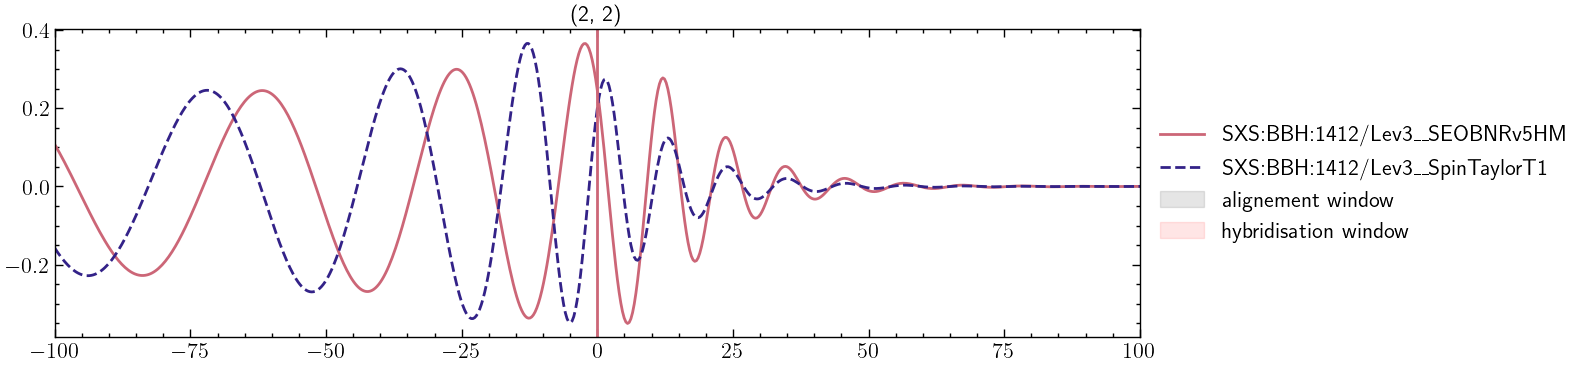

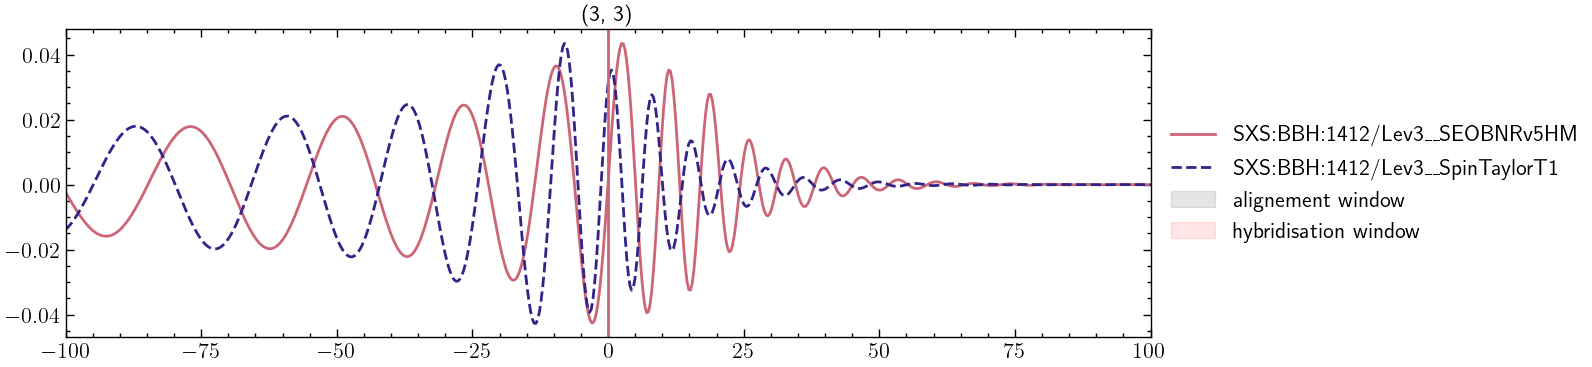

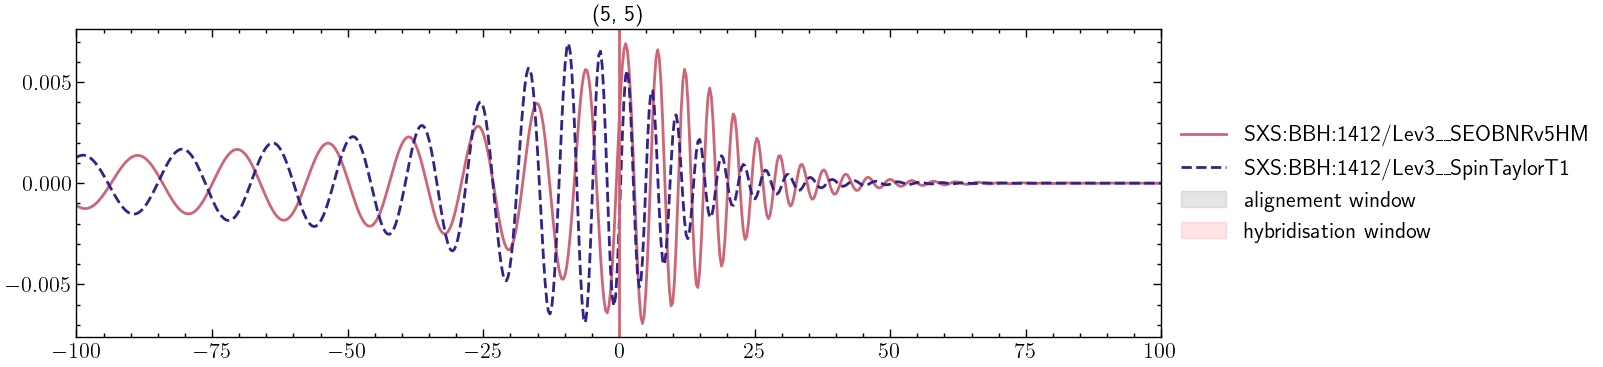

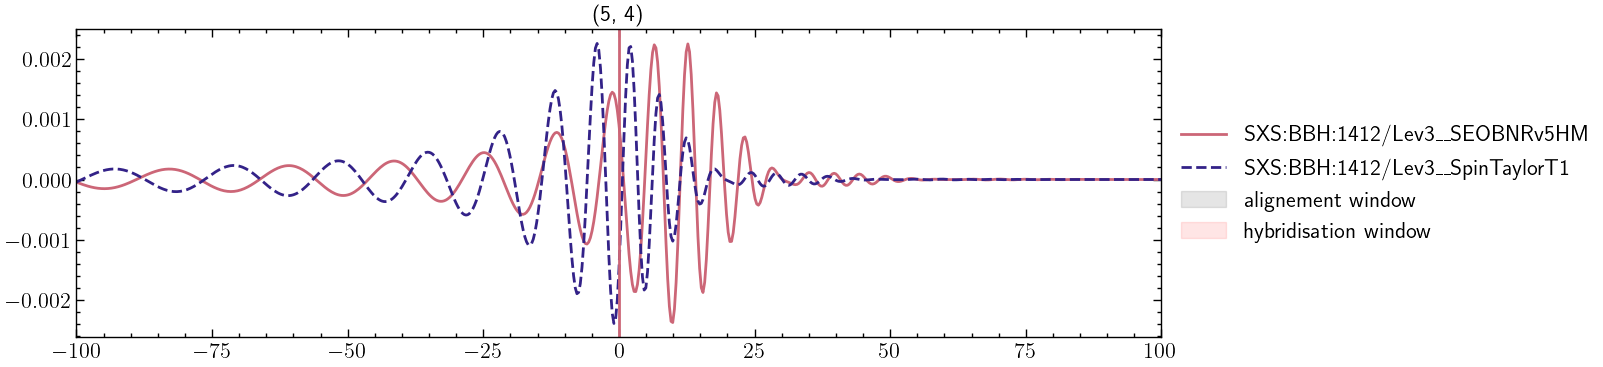

In [35]:
for mode in modes:
    plt.figure(figsize=(14, 4))
    for k in np.sort(list(wf_hybrids.keys())):
        x_plot = wf_hybrids[k].times
        y_plot = wf_hybrids[k].hlms[mode].real
        if 'SpinTaylor' in k:
            ls='--'
        else:
            ls='-'
        plt.plot(x_plot, y_plot, label=f'{k}', ls=ls)
    plt.xlim(-100, 100)
    # plt.xlim(-1000, 100)
    # plt.xlim(-4000, 100)
    # plt.xlim(-5000, 100)
    plt.axvline(0)
    plt.axvspan(metadata_hybrids['alignement_window']['win1'], metadata_hybrids['alignement_window']['win2'], color="k", alpha=0.1, label="alignement window")
    plt.axvspan(hyb_win1, hyb_win2, color="r", alpha=0.1, label="hybridisation window")
    plt.title(mode)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    plt.close()

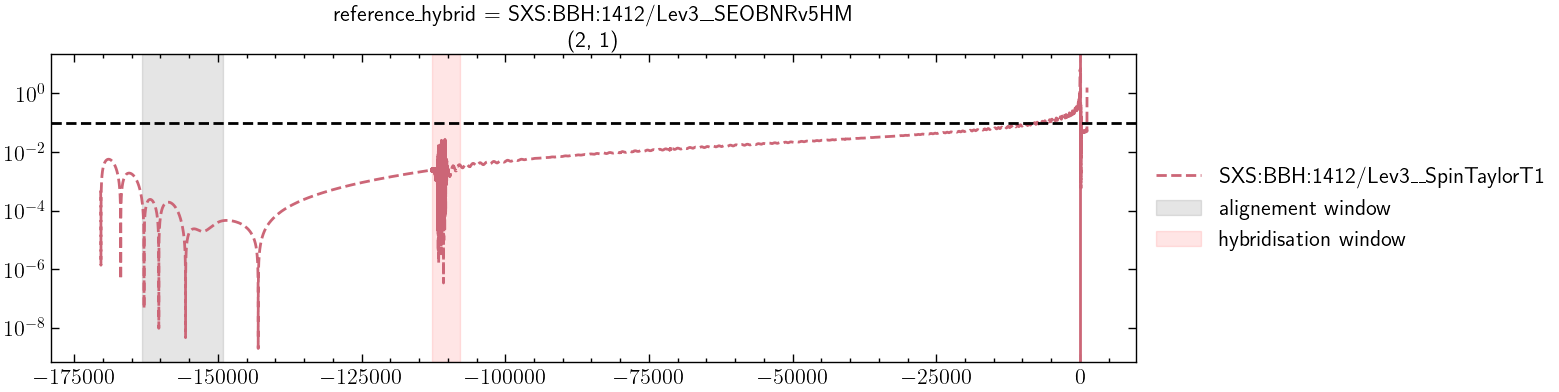

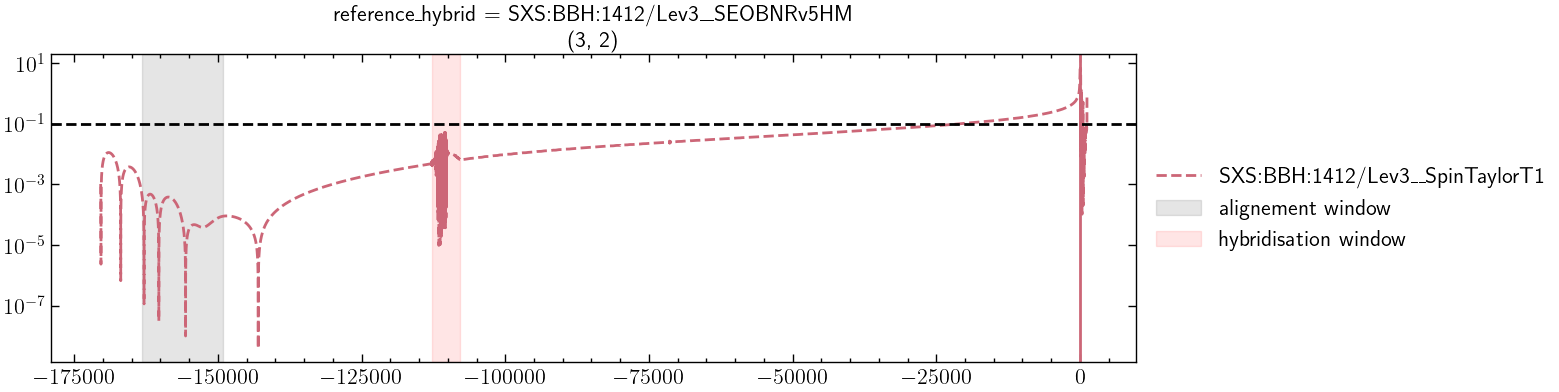

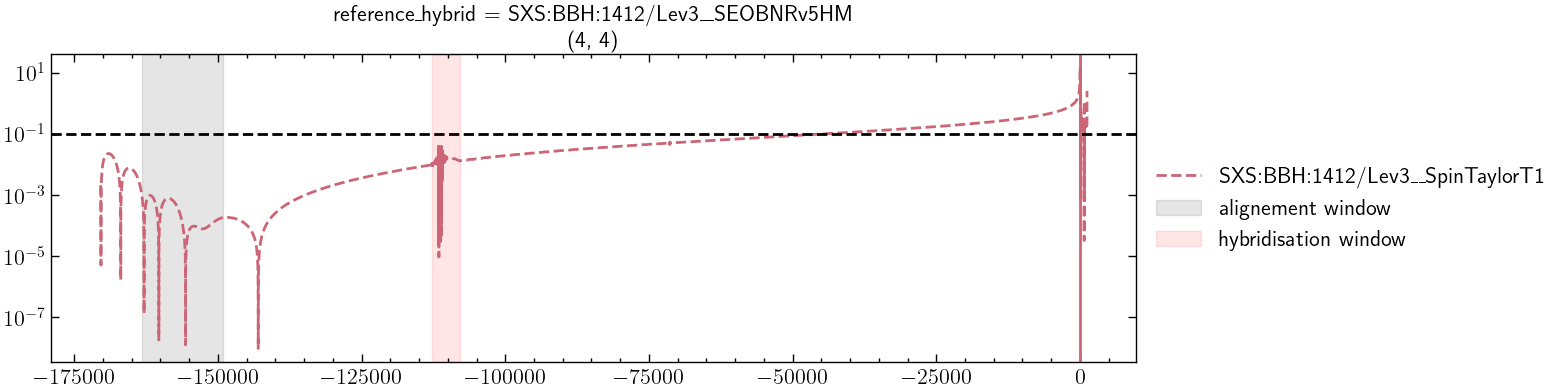

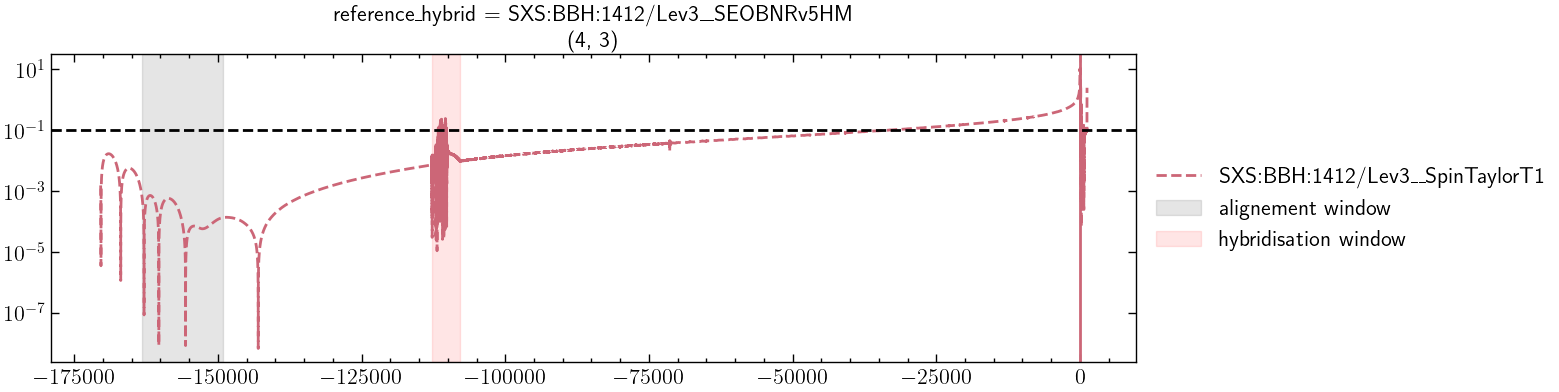

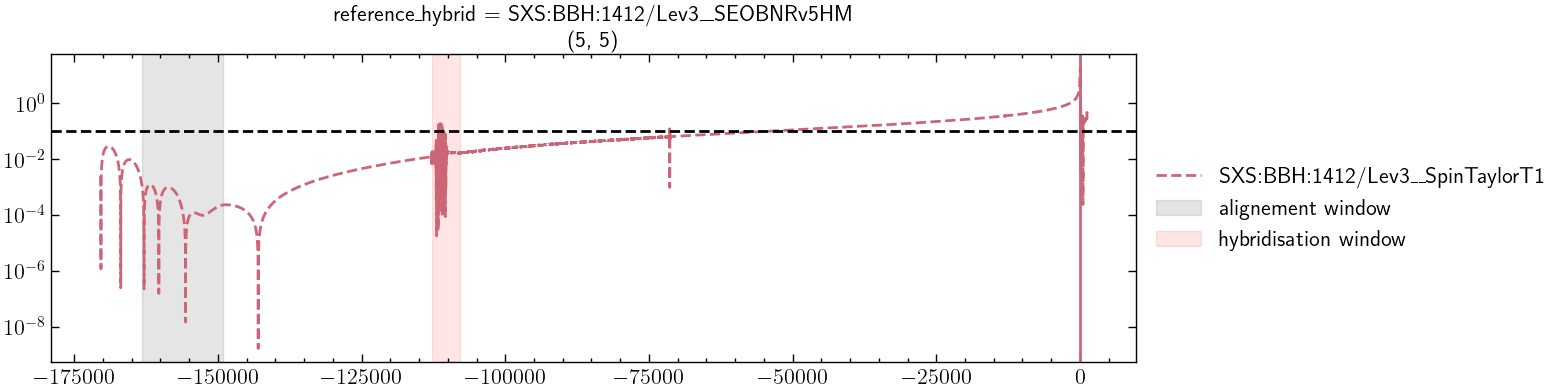

In [36]:
for mode in modes:
    plt.figure(figsize=(14, 4))
    x_ref = wf_hybrids[metadata_hybrids['reference_hybrid']].times
    y_ref = wf_hybrids[metadata_hybrids['reference_hybrid']].phases[mode].real
    for k in np.sort(metadata_hybrids['other_hybrids']):
        y_other = wf_hybrids[k].phases[mode].real
        y_diff = y_ref - y_other
        y_diff = np.abs(y_diff)
        if 'SpinTaylor' in k:
            ls='--'
        else:
            ls='-'
        plt.plot(x_ref, y_diff, label=f'{k}', ls=ls)
    # plt.xlim(-100, 100)
    # plt.xlim(-1000, 100)
    # plt.xlim(-5000, 100)
    # plt.ylim(0.01, 2)
    plt.axhline(0.1, c='k', ls='--')
    plt.axvline(0)
    plt.axvspan(metadata_hybrids['alignement_window']['win1'], metadata_hybrids['alignement_window']['win2'], color="k", alpha=0.1, label="alignement window")
    plt.axvspan(hyb_win1, hyb_win2, color="r", alpha=0.1, label="hybridisation window")
    plt.yscale('log')
    plt.title(f"reference_hybrid = {metadata_hybrids['reference_hybrid']}\n {mode}")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    plt.close()

In [37]:
y_diffs = {}
x_ref = wf_hybrids[metadata_hybrids['reference_hybrid']].times
for mode in modes:
    y_diffs[mode]=[]
    y_ref = wf_hybrids[metadata_hybrids['reference_hybrid']].phases[mode].real
    for k in np.sort(metadata_hybrids['other_hybrids']):
        y_other = wf_hybrids[k].phases[mode].real
        y_diff = y_ref - y_other
        # y_diff = np.abs(y_diff)
        y_diffs[mode].append(y_diff)
    y_diffs[mode] = np.row_stack(y_diffs[mode])

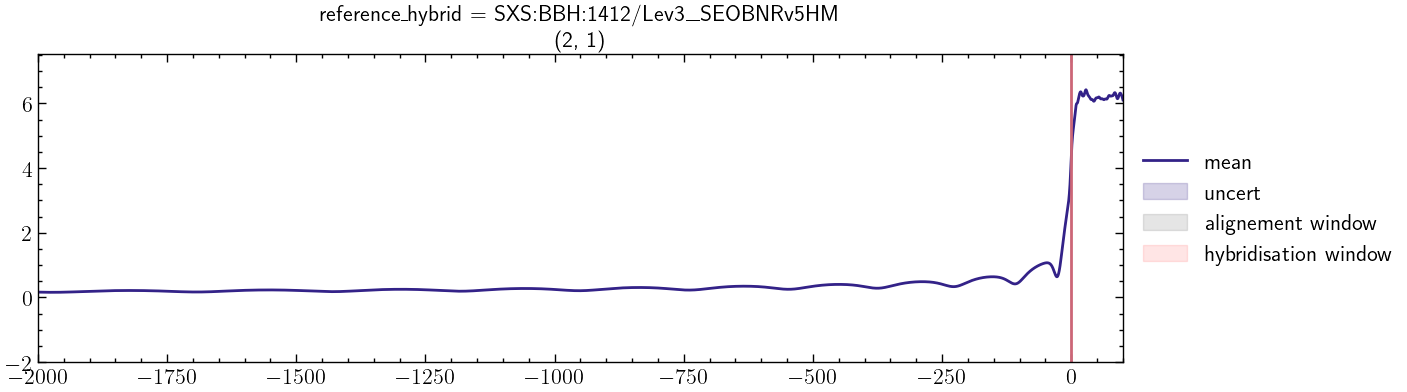

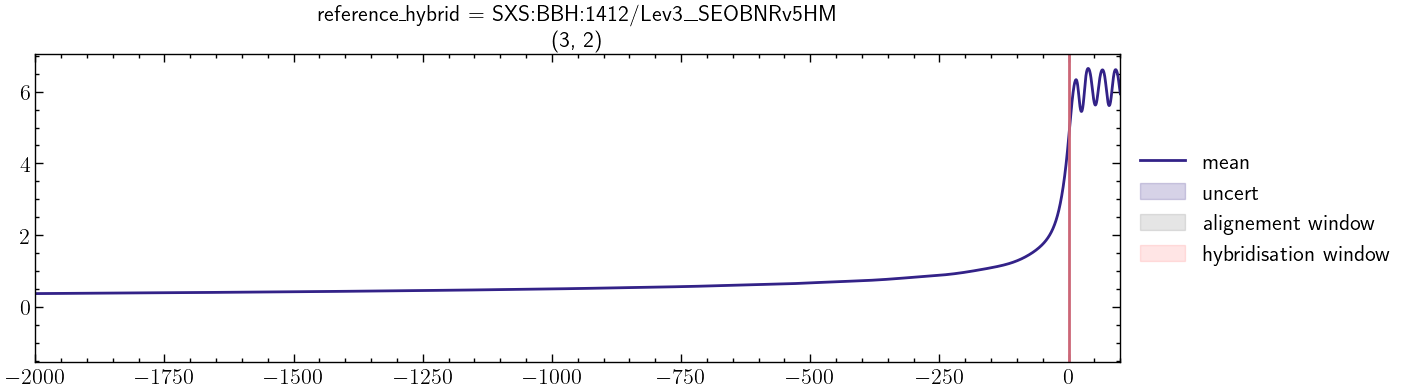

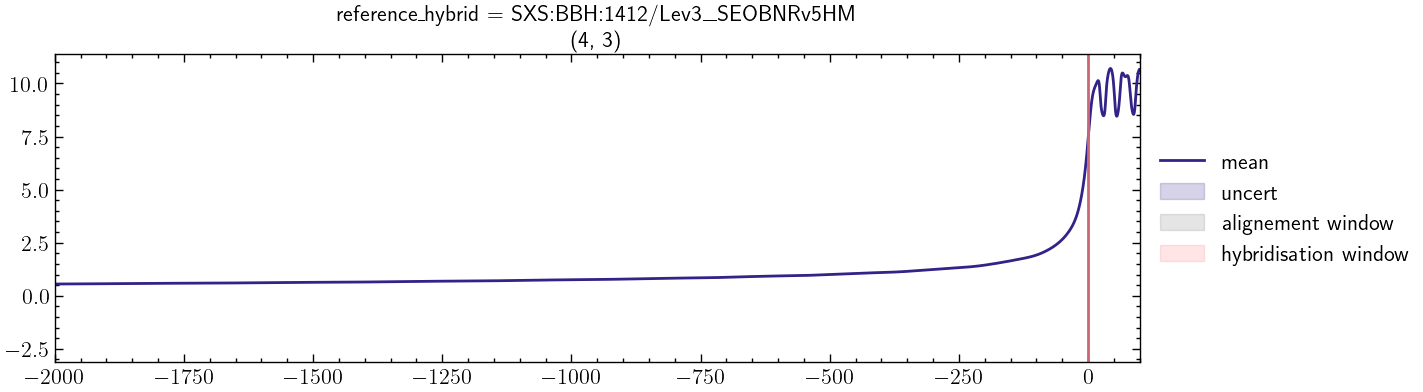

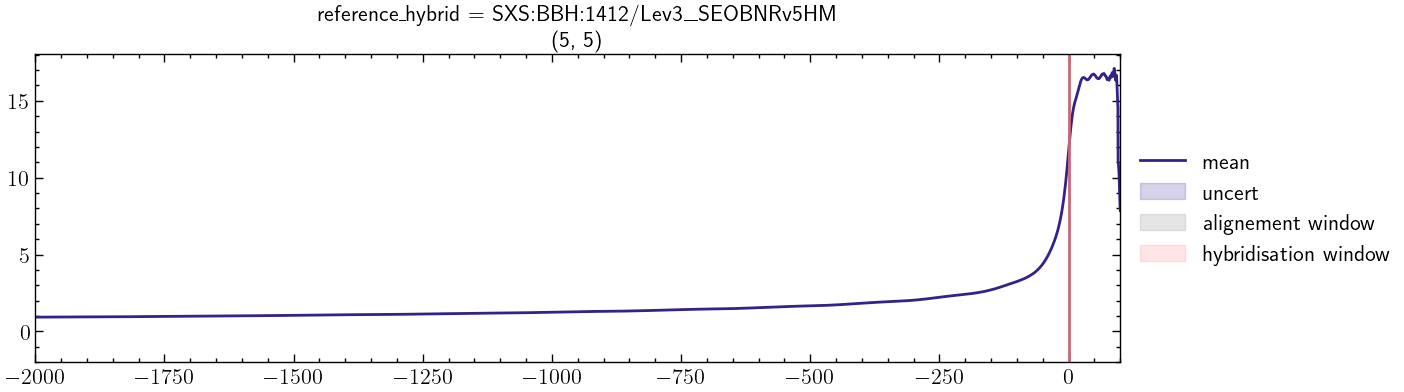

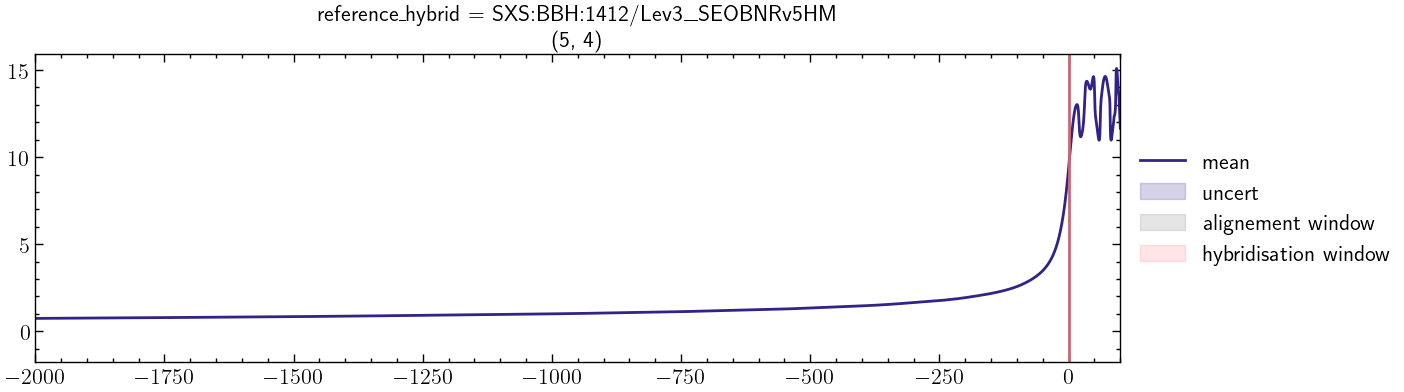

In [38]:
for mode in modes:
    plt.figure(figsize=(14, 4))
    plt.plot(x_ref, y_diffs[mode].mean(0), color='C1', label='mean')
    # plt.plot(x_ref, y_diffs[mode].T, c='k', alpha=0.1);
    plt.fill_between(x_ref, y1=y_diffs[mode].min(0), y2=y_diffs[mode].max(0), color='C1', alpha=0.2, label='uncert')
    plt.xlim(-2000, 100)
    # plt.axhline(0.1, c='k', ls='--')
    plt.axvline(0)
    plt.axvspan(metadata_hybrids['alignement_window']['win1'], metadata_hybrids['alignement_window']['win2'], color="k", alpha=0.1, label="alignement window")
    plt.axvspan(hyb_win1, hyb_win2, color="r", alpha=0.1, label="hybridisation window")
    plt.title(f"reference_hybrid = {metadata_hybrids['reference_hybrid']}\n {mode}")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [39]:
y_diffs = {}
x_ref = wf_hybrids[metadata_hybrids['reference_hybrid']].times
for mode in modes:
    y_diffs[mode]=[]
    y_ref = wf_hybrids[metadata_hybrids['reference_hybrid']].frequencies[mode].real
    for k in np.sort(metadata_hybrids['other_hybrids']):
        y_other = wf_hybrids[k].frequencies[mode].real
        y_diff = y_ref - y_other
        # y_diff = np.abs(y_diff)
        y_diffs[mode].append(y_diff)
    y_diffs[mode] = np.row_stack(y_diffs[mode])

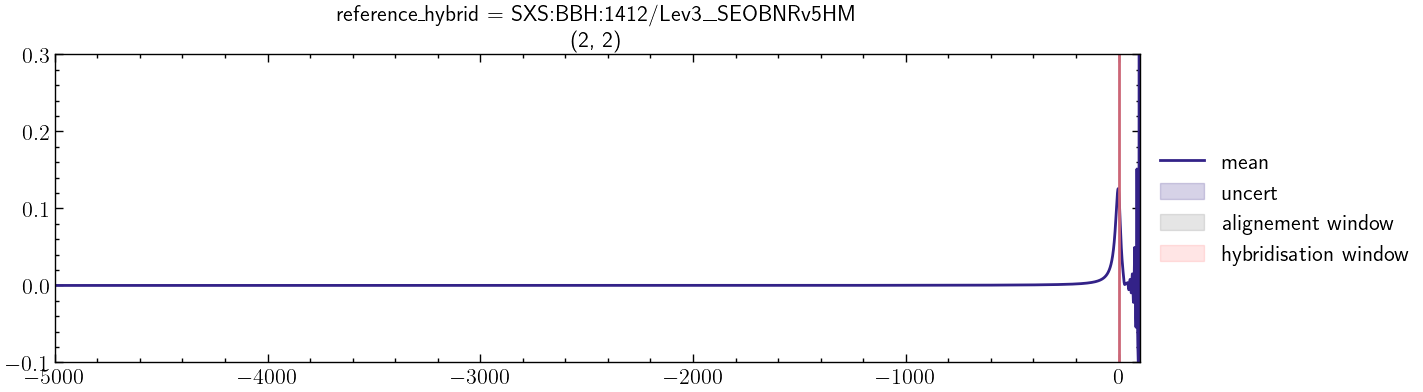

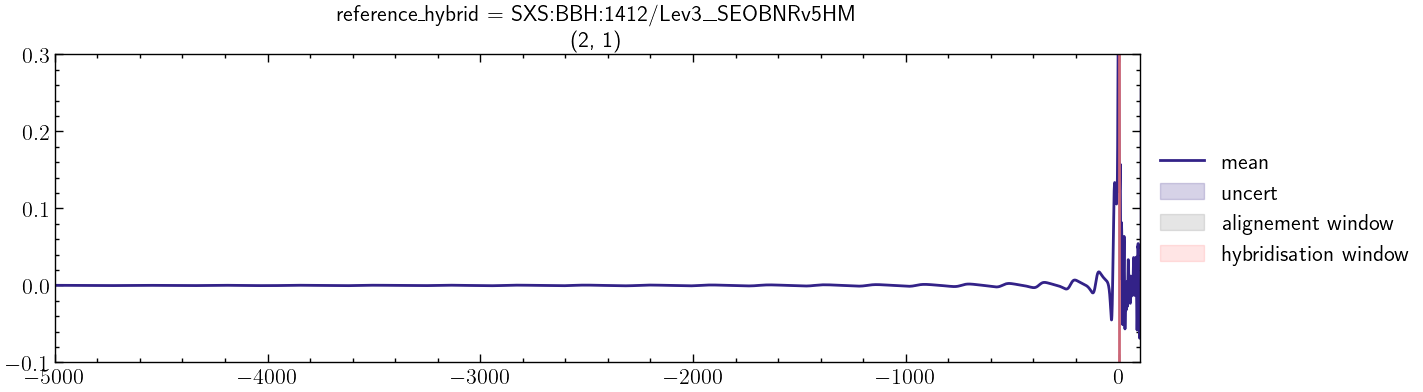

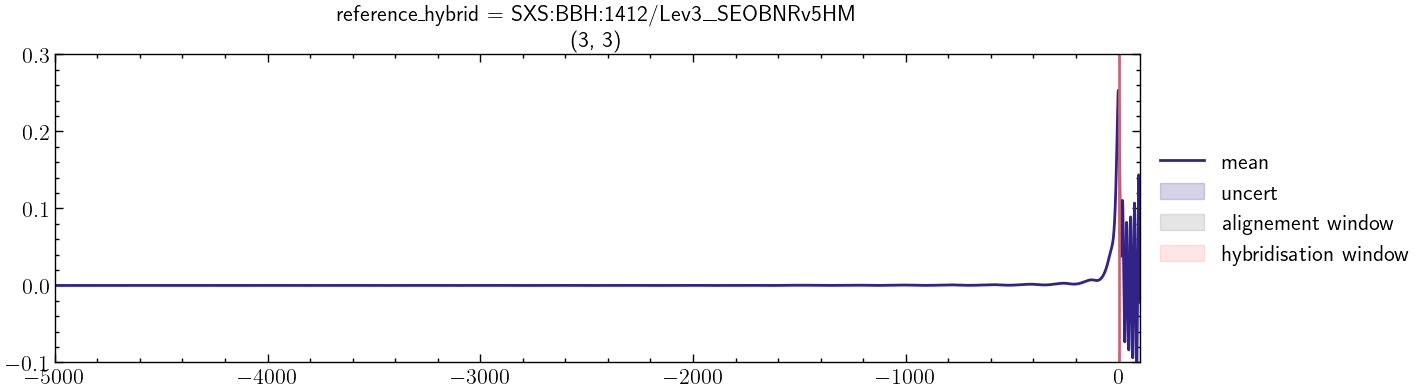

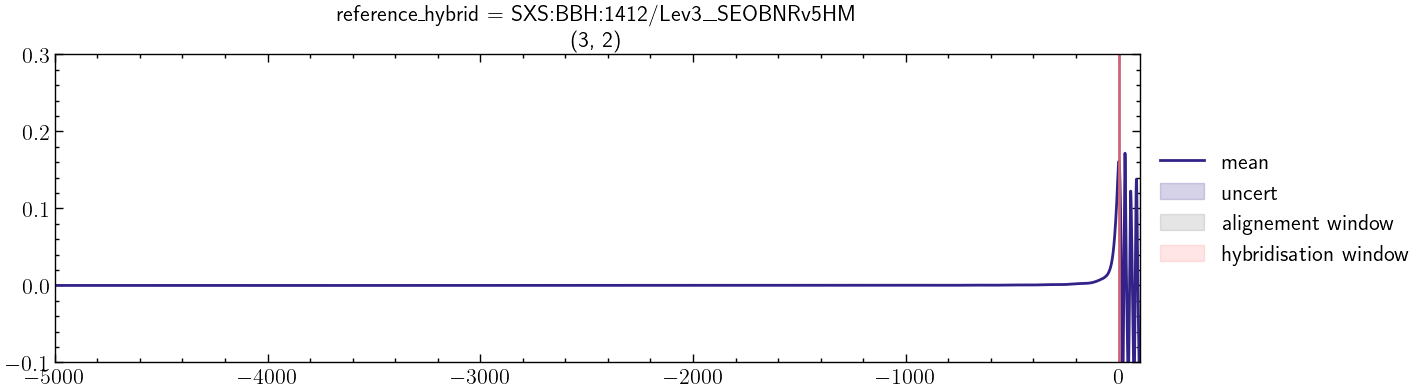

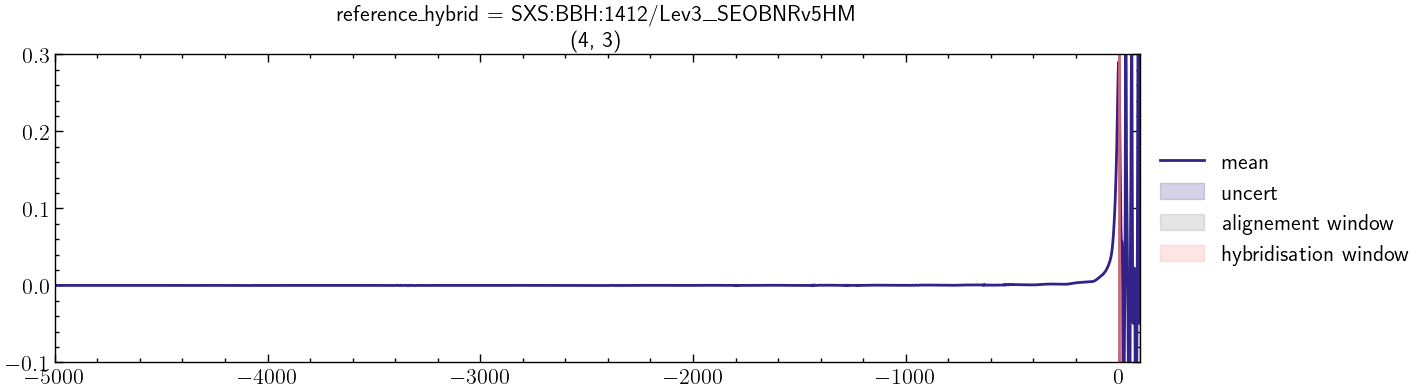

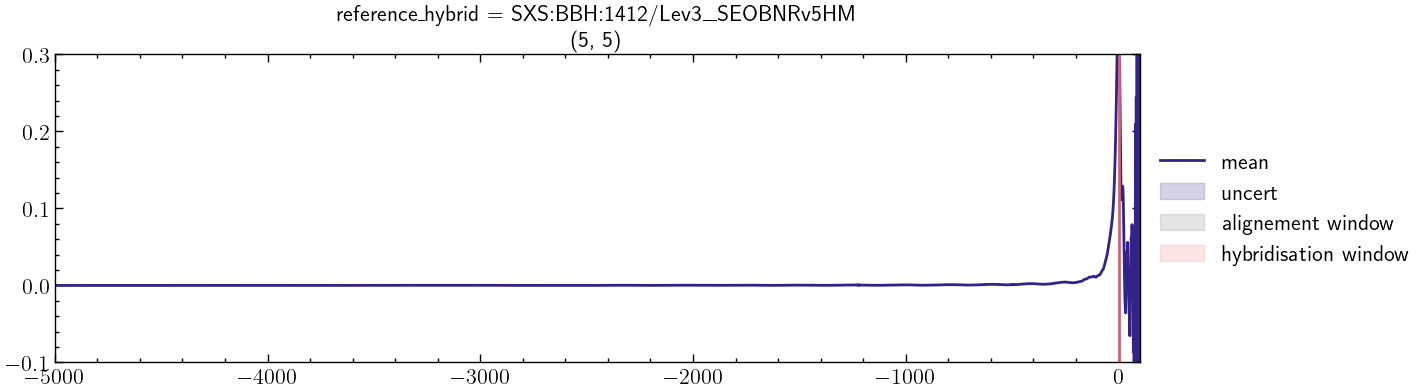

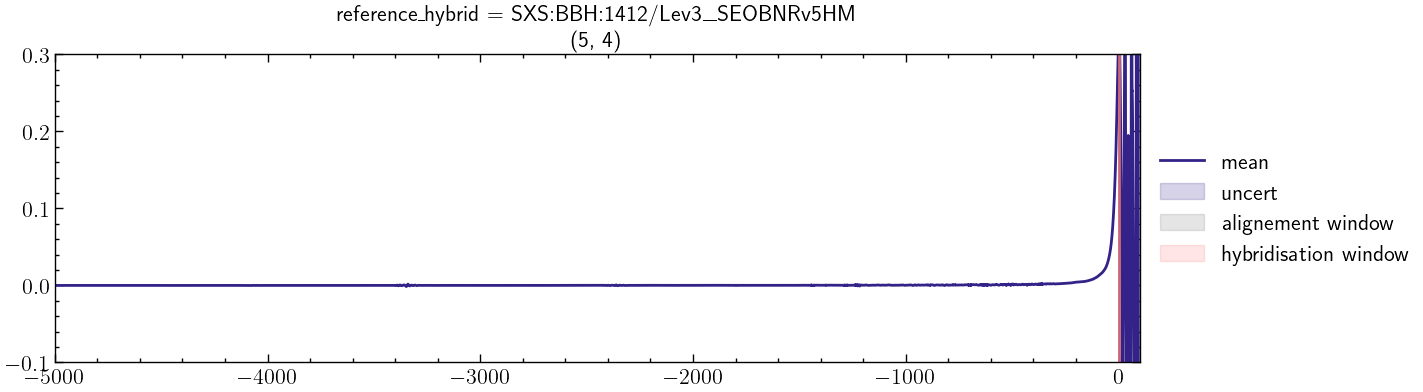

In [40]:
for mode in modes:
    plt.figure(figsize=(14, 4))
    plt.plot(x_ref, y_diffs[mode].mean(0), color='C1', label='mean')
    # plt.plot(x_ref, y_diffs[mode].T, c='k', alpha=0.1);
    plt.fill_between(x_ref, y1=y_diffs[mode].min(0), y2=y_diffs[mode].max(0), color='C1', alpha=0.2, label='uncert')
    # plt.xlim(-2000, 100)
    plt.xlim(-5000, 100)
    plt.ylim(-0.1, 0.3)
    # plt.axhline(0.1, c='k', ls='--')
    plt.axvline(0)
    # plt.axhline(0.1, ls='--')
    # plt.yscale('log')
    plt.axvspan(metadata_hybrids['alignement_window']['win1'], metadata_hybrids['alignement_window']['win2'], color="k", alpha=0.1, label="alignement window")
    plt.axvspan(hyb_win1, hyb_win2, color="r", alpha=0.1, label="hybridisation window")
    plt.title(f"reference_hybrid = {metadata_hybrids['reference_hybrid']}\n {mode}")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# collocation point modelling

https://gitlab.com/SpaceTimeKhantinuum/ml/-/blob/master/waveforms/oct2022/uncertainty/nr_only/scratch_2/inspiral-freq-model.ipynb

In [41]:
# custom
import phenom
import prim.taylort3

In [42]:
import sympy
# sympy.init_printing()
# x_sym, a_sym, om_rd = sympy.symbols('x_sym a_sym om_rd')

# x_sym: generic name I use for independent variables for sympy
x_sym = sympy.symbols('x_sym')

In [43]:
np.linspace(0.4, 0.8, 4)

array([0.4       , 0.53333333, 0.66666667, 0.8       ])

In [44]:
# TaylorT3 PN parameters
tc=0 # doesn't work so well for high q
# tc=100 # reasonable compromise
# tc=1000 # doesn't recover T3 for early times
M=1


eta = phenom.eta_from_q(q)


# can choose to resample or not
# dt = 0.1
dt = None



## DEFINE ANSATZ

# dofs = 3
dofs = 4

# base_ansatz = np.sum([x_sym**i for i in range(dofs)])
base_ansatz = np.sum([x_sym**(8+i) for i in range(dofs)])

# base_ansatz = np.sum([x_sym**9, x_sym**10])

# base_ansatz = np.sum([x_sym**8, x_sym**9])
# base_ansatz = np.sum([x_sym**8, x_sym**9, x_sym**10])
# base_ansatz = np.sum([x_sym**8, x_sym**9, x_sym**10, x_sym**11])
# base_ansatz = np.sum([x_sym**8, x_sym**9, x_sym**10, x_sym**11, x_sym**12])
# base_ansatz = np.sum([x_sym**8, x_sym**9, x_sym**10, x_sym**11, x_sym**12, x_sym**13])

# base_ansatz = np.sum([x_sym**9, x_sym**10, x_sym**11, x_sym**12, x_sym**13, x_sym**14])

# theta_collocation = [0.1, 0.33, 0.45, 0.55, 0.65, 0.75, 0.82]
# theta_collocation = [0.33, 0.45, 0.65, 0.82]



# cps = np.linspace(0.5, 0.9, dofs)

# cps = np.linspace(0.5, 0.75, dofs)


# cps = np.linspace(0.45, 0.9, dofs)
# cps = np.linspace(0.45, 0.8, dofs)
# cps = np.linspace(0.5, 0.8, dofs)
cps = np.linspace(0.42, 0.8, dofs)
# cps = np.linspace(0.42, 0.7, dofs)


theta_cp_fixed = prim.taylort3.TaylorT3_theta(-200, tc, eta, M)
cps[-1] = theta_cp_fixed
# cps = np.array([0.42, 0.6, theta_cp_fixed])



collocation_points_theta = {
    # 0:[-700, -300, -100],
    # 0:[0.4, 0.45, 0.55, 0.82],
    # 0:[0.4, 0.53, 0.67, 0.8],
    # 0:np.linspace(0.33, 0.7, dofs),
    # 0:np.linspace(0.33, 0.75, dofs),
    0:cps,
}



collocation_points_M = {}
for k in collocation_points_theta:
    theta_array = np.array(collocation_points_theta[k])
    collocation_points_M[k] = prim.taylort3.TaylorT3_t(theta_array, tc, eta, M)

# collocation_points_M = {0:[-700,-300,-100]}


# Time range avaiable to use for fitting and testing
pad = 20
# t_start = collocation_points_M[0][0] - pad - 10000
# t_start = -80000
t_start = wf_hybrids[metadata_hybrids['reference_hybrid']].times[0]
t_end = collocation_points_M[0][-1] + pad

print(t_start, t_end)

-170401.53233535305 -180.0


In [45]:
prim.taylort3.TaylorT3_t(0.9, tc, phenom.eta_from_q(1), M)

-46.46114625083754

In [46]:
q, chi1, chi2

(1.629974689500553, 0.400006079655, -0.299983545203)

In [47]:
# might fix the last collocation point to be -100M or something like that so that we can align
# for the merger model calculation.

In [48]:
collocation_points_M

{0: array([-21912.80420933,  -2660.18312945,   -502.17069333,   -200.        ])}

In [49]:
collocation_points_theta

{0: array([0.42      , 0.54666667, 0.67333333, 0.75545358])}

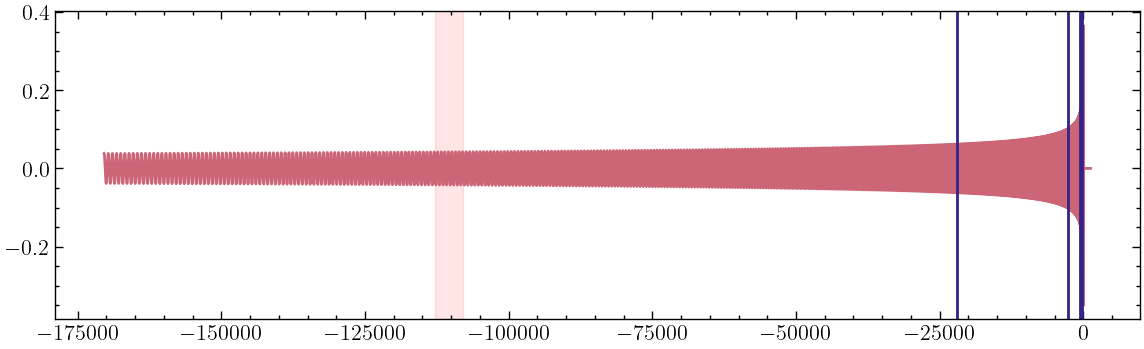

In [50]:
plt.figure(figsize=(14, 4))
plt.plot(wf_hybrids[metadata_hybrids['reference_hybrid']].times, wf_hybrids[metadata_hybrids['reference_hybrid']].hlms[2,2].real)
for v in collocation_points_M[0]:
    plt.axvline(v, c='C1')
# plt.xlim(-1000, 100)
plt.axvspan(hyb_win1, hyb_win2, color="r", alpha=0.1, label="hybridisation window")

In [51]:
plt.figure(figsize=(14, 4))
plt.plot(x_ref, y_diffs[2,2].mean(0), color='C0', label='mean')
plt.plot(x_ref, y_diffs[2,2].T, c='k', alpha=0.1);
plt.fill_between(x_ref, y1=y_diffs[2,2].min(0), y2=y_diffs[2,2].max(0), color='C0', alpha=0.2, label='uncert')
for v in collocation_points_M[0]:
    plt.axvline(v, c='C1')
plt.xlim(-1000, 100)
plt.ylim(-0.1,0.1)
plt.title('2,2')

Text(0.5, 1.0, '2,2')

In [52]:
# we can apply an affine transformation
# to the PN inspiral portion
# of the waveform in order to
# get the data in the appropriate
# form for the PN-like ansatz

def transformation_affine_foward(x, a=1, b=0):
    """
    return y=a*x + b
    """
    return a*x + b

def transformation_affine_reverse(y, a=1, b=0):
    """
    return x=(y-b)/a
    """
    return (y-b)/a

        
def get_taylort3_inspiral_omega_affine_params(t, tc, eta, M, chi1, chi2):
    """
    get inspiral angular GW frequency TaylorT3 Newtonian term
    and TaylorT3 approximation
    
    returns: Newtonaian Term and Full TaylorT3 approximation
    """
    omega_N = prim.taylort3.TaylorT3_Omega_GW_Newt(t, tc, eta, M)
    omega_pn = prim.taylort3.TaylorT3_Omega_GW(t, tc, eta, M, chi1, chi2)
    return omega_N, omega_pn
        

def prepare_fit_data(waveform, t_start, t_end, target, dt=None, mode=(2,2)):
    """
    waveform: instance of waveform
    t_start, t_end: float. start and end times that the returned data will cover
    target: str. name of target attribute to model e.g. 'amp', 'phase', 'freq'
    """
    # eta = waveform.eta
    times = waveform.times
    mask = (times >= t_start) & (times <= t_end)

    t = times[mask]
    # y = waveform.__getattribute__(target)
    y = waveform.__getattribute__(target)[mode]
    y = y[mask]

    if dt != None:
        # interpolate with new spacing
        t_new = np.arange(t[0], t[-1], dt)
        y = IUS(t, y)(t_new)
        t = t_new
        
    return t, y


In [53]:
class WaveformCollocationFitter(object):
    """
    a class to manage fitting with the collocation method
    """
    def __init__(self,
                 x,
                 y,
                 collocation_points,
                 ansatz,
                 sub_dict={}, # empty dict by default
                ):
        """
        
        sub_dict: substitution dictionary for sympy ansatz
        """
        self.x = x
        self.y = y
        self.collocation_points = collocation_points
        self.ansatz = ansatz.copy()
        self.sub_dict = sub_dict.copy()
        # self.rhs_override = rhs_override
        

        # interpolate target so we can evaluate
        # it and it's derivative at any x value
        self.iy = IUS(self.x, self.y)
        
        # evaluate interpolant at corresponding derivative order
        # and location
        self.rhs = {}
        for k in self.collocation_points.keys():
            v = map(self.iy.derivative(k), self.collocation_points[k])
            v = np.array(list(v))
            self.rhs[k] = v
            
        # override rhs
        # can use this to enforce rhs values
        # if self.rhs_override is not None:
        #     for k in self.rhs_override.keys():
        #         for i, v in self.rhs_override[k]:
        #             self.rhs[k][i] = v
        
            
        self.cm = prim.collocation.CollocationModel(
            collocation_points=self.collocation_points,
            collocation_values=self.rhs,
            ansatz=self.ansatz,
            sub_dict=self.sub_dict,
        )
        
        


In [54]:
from scipy.interpolate import InterpolatedUnivariateSpline as IUS
import prim.collocation

In [55]:
class InspiralFitter:
    def __init__(self, waveform, t_start, t_end, q, chi1, chi2, base_ansatz, collocation_points, tc=0, M=1, mode=(2,2)):
        self.mode = mode
        self.eta = phenom.eta_from_q(q)
        self.tc=tc
        self.M=M
        x, self.y = prepare_fit_data(waveform, t_start, t_end, 'frequencies', mode=self.mode)
        # NOTE: swap sign because my PN taylort3 has opposite sign... very important
        self.y = -self.y
        #
        # PN parameters
        pn_kwargs=dict(t=x, tc=self.tc, eta=self.eta, M=self.M)
        # Get PN transformation variables
        self.omega_N, self.omega_pn = get_taylort3_inspiral_omega_affine_params(x, self.tc, self.eta, self.M, chi1, chi2)
         # apply tranformation
        y_transformed = transformation_affine_reverse(self.y, self.omega_N, self.omega_pn)

        # prepare ansatz
        theta = prim.taylort3.TaylorT3_theta(x_sym, self.tc, self.eta, self.M)
        pn_sub_dict = {'x_sym': theta}
        ansatz = base_ansatz.subs(pn_sub_dict)
        sub_dict={}

        self.x = x
        self.y_transformed = y_transformed

        self.x_theta = prim.taylort3.TaylorT3_theta(self.x, self.tc, self.eta, self.M)
        
        self.wcf = WaveformCollocationFitter(
            self.x,
            self.y_transformed,
            collocation_points,
            ansatz,
            sub_dict,
        )


    def fit(self, X, y):
        # X = self.forward(X)
        pass

In [56]:
insfit = InspiralFitter(wf_hybrids[metadata_hybrids['reference_hybrid']], t_start, t_end, q, chi1, chi2, base_ansatz, collocation_points_M)

In [57]:
insfit.wcf

In [58]:
cm = insfit.wcf.cm

In [59]:
cm.coeffs

array([-71.41732135,  21.42057211, 134.7725078 , -86.44827827])

In [60]:
cm.collocation_points

{0: array([-21912.80420933,  -2660.18312945,   -502.17069333,   -200.        ])}

In [61]:
cm.collocation_points_1d

array([-21912.80420933,  -2660.18312945,   -502.17069333,   -200.        ])

In [62]:
cm.dof

4

In [63]:
cm.information_matrix

array([[7.17368321e-05, 9.68265200e-04, 1.70801981e-04, 4.06671384e-04],
       [1.30301233e-03, 7.97591922e-03, 2.38355915e-03, 4.36016917e-03],
       [1.28982640e-02, 4.22513819e-02, 1.91558376e-02, 2.84492638e-02],
       [4.57388923e-02, 1.06087029e-01, 6.05449406e-02, 8.01438260e-02]])

In [64]:
cm.rhs

{0: array([0.00348091, 0.02210023, 0.10617971, 0.23739338])}

In [65]:
cm.collocation_points_1d

array([-21912.80420933,  -2660.18312945,   -502.17069333,   -200.        ])

In [66]:
plt.plot(insfit.x, insfit.y_transformed, label='hybrid')
plt.scatter(cm.collocation_points_1d, cm.rhs_1d, label='collocation')
plt.plot(insfit.x, cm.predict(insfit.x), ls='--', label='fit')
# plt.ylim(-10, 1)
# plt.xlim(-1000, 100)
plt.legend()
plt.xlabel('t (M)')
plt.axvspan(hyb_win1, hyb_win2, color="r", alpha=0.1, label="hybridisation window")

In [67]:
hyb_win1_theta, hyb_win2_theta = prim.taylort3.TaylorT3_theta(np.array([hyb_win1, hyb_win2]), insfit.tc, insfit.eta, insfit.M)

Text(0.5, 0, '$\\theta$')

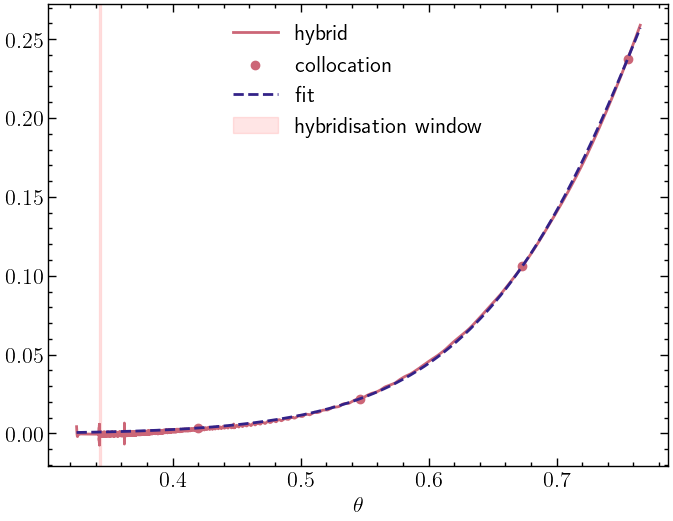

In [68]:
plt.plot(insfit.x_theta, insfit.y_transformed, label='hybrid')
# plt.scatter(cm.collocation_points_1d, cm.rhs_1d)
plt.scatter(collocation_points_theta[0], cm.rhs_1d, label='collocation')
plt.plot(insfit.x_theta, cm.predict(insfit.x), ls='--', label='fit')
# plt.ylim(-10, 1)
plt.axvspan(hyb_win1_theta, hyb_win2_theta, color="r", alpha=0.1, label="hybridisation window")
plt.legend()
plt.xlabel(r"$\theta$")

In [69]:
collocation_points_theta

{0: array([0.42      , 0.54666667, 0.67333333, 0.75545358])}

In [70]:
yhat = transformation_affine_foward(cm.predict(insfit.x), insfit.omega_N, insfit.omega_pn)

In [71]:
rhs_omega_N, rhs_omega_pn = get_taylort3_inspiral_omega_affine_params(cm.collocation_points_1d, insfit.tc, insfit.eta, insfit.M, chi1, chi2)

In [72]:
cm.coeffs

array([-71.41732135,  21.42057211, 134.7725078 , -86.44827827])

In [73]:
cm.rhs_1d

array([0.00348091, 0.02210023, 0.10617971, 0.23739338])

In [74]:
rhs_yhat = transformation_affine_foward(cm.rhs_1d, rhs_omega_N, rhs_omega_pn)

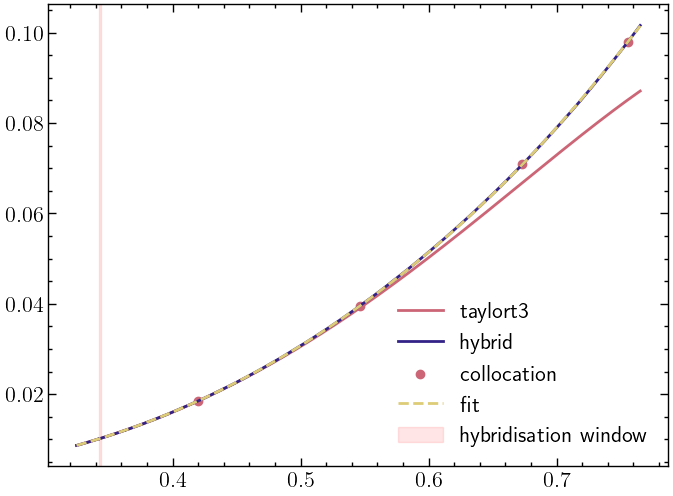

In [75]:
plt.plot(insfit.x_theta, insfit.omega_pn, label='taylort3')
plt.plot(insfit.x_theta, insfit.y, label='hybrid')
# plt.scatter(cm.collocation_points_1d, rhs_yhat)
plt.scatter(collocation_points_theta[0], rhs_yhat, label='collocation')
plt.plot(insfit.x_theta, yhat, ls='--', label='fit')
# plt.ylim(-10, 1)




plt.axvspan(hyb_win1_theta, hyb_win2_theta, color="r", alpha=0.1, label="hybridisation window")

plt.legend()

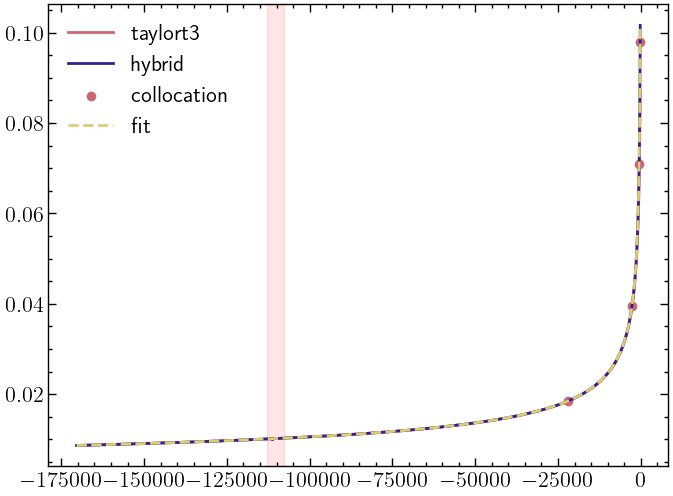

In [76]:
plt.plot(insfit.x, insfit.omega_pn, label='taylort3')
plt.plot(insfit.x, insfit.y, label='hybrid')
plt.scatter(cm.collocation_points_1d, rhs_yhat, label='collocation')
# plt.scatter(collocation_points_theta[0], rhs_yhat, label='collocation')
plt.plot(insfit.x, yhat, ls='--', label='fit')
# plt.xlim(-5000, 100)
plt.legend()
plt.axvspan(hyb_win1, hyb_win2, color="r", alpha=0.1, label="hybridisation window")

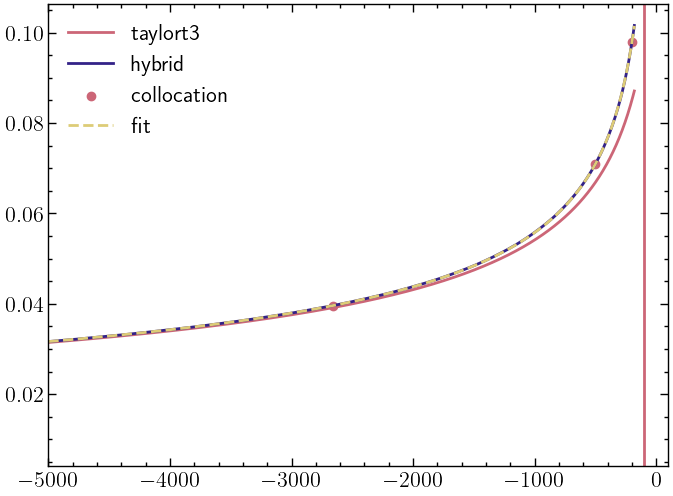

In [77]:
plt.plot(insfit.x, insfit.omega_pn, label='taylort3')
plt.plot(insfit.x, insfit.y, label='hybrid')
plt.scatter(cm.collocation_points_1d, rhs_yhat, label='collocation')
# plt.scatter(collocation_points_theta[0], rhs_yhat, label='collocation')
plt.plot(insfit.x, yhat, ls='--', label='fit')
plt.xlim(-5000, 100)
plt.axvline(-100)
plt.legend()
plt.axvspan(hyb_win1, hyb_win2, color="r", alpha=0.1, label="hybridisation window")

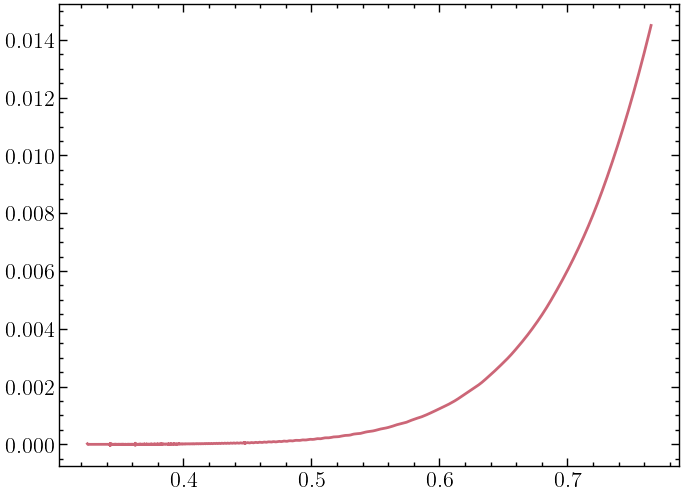

In [78]:
plt.plot(insfit.x_theta, insfit.y-insfit.omega_pn)
# plt.plot(insfit.x_theta, insfit.y)
# # plt.scatter(cm.collocation_points_1d, rhs_yhat)
# plt.scatter(collocation_points_theta[0], rhs_yhat)
# plt.plot(insfit.x_theta, yhat, ls='--')
# plt.ylim(-10, 1)

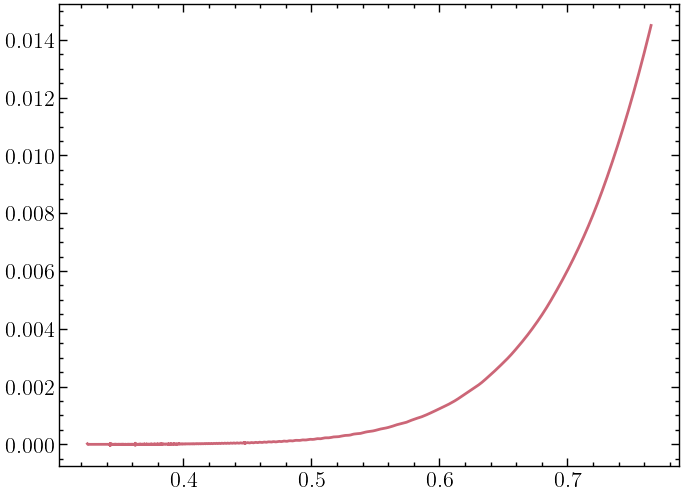

In [79]:
plt.plot(insfit.x_theta, insfit.y-insfit.omega_pn)
# plt.plot(insfit.x_theta, insfit.y)
# # plt.scatter(cm.collocation_points_1d, rhs_yhat)
# plt.scatter(collocation_points_theta[0], rhs_yhat)
# plt.plot(insfit.x_theta, yhat, ls='--')
# plt.ylim(-10, 1)
# plt.yscale('log')

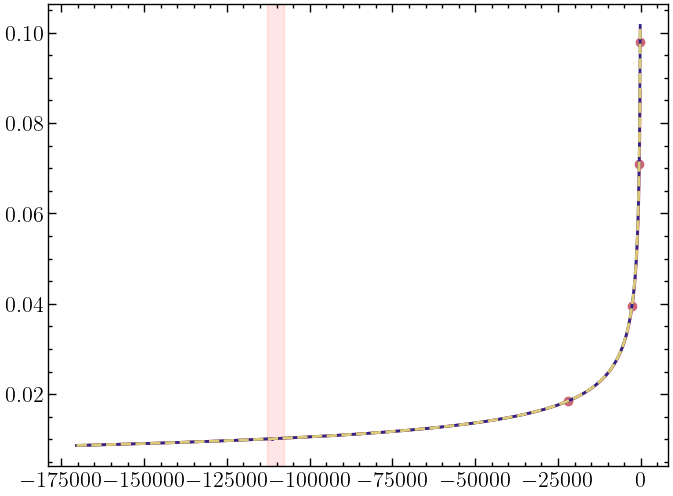

In [80]:
plt.plot(insfit.x, insfit.omega_pn)
plt.plot(insfit.x, insfit.y)
plt.scatter(cm.collocation_points_1d, rhs_yhat)
# plt.scatter(collocation_points_theta[0], rhs_yhat)
plt.plot(insfit.x, yhat, ls='--')
plt.axvspan(hyb_win1, hyb_win2, color="r", alpha=0.1, label="hybridisation window")

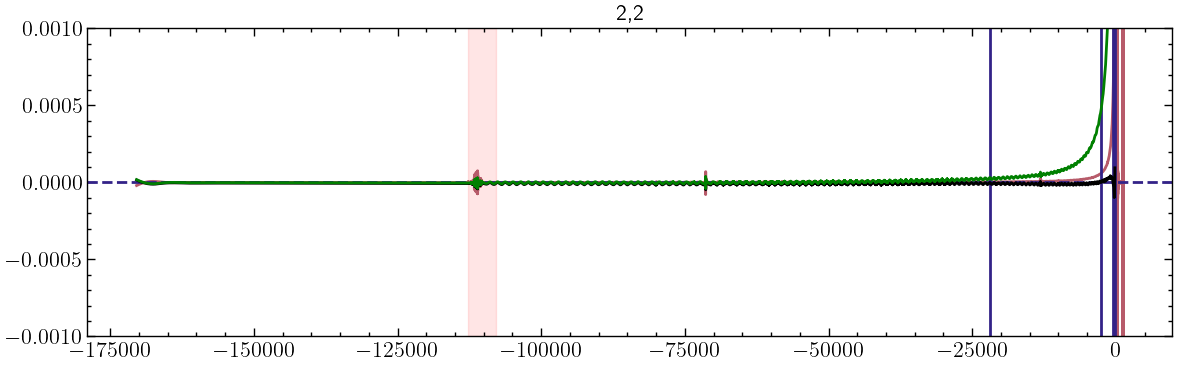

In [81]:
plt.figure(figsize=(14, 4))
plt.plot(x_ref, y_diffs[2,2].mean(0), color='C0', label='mean')
plt.plot(x_ref, y_diffs[2,2].T, c='k', alpha=0.1);
plt.fill_between(x_ref, y1=y_diffs[2,2].min(0), y2=y_diffs[2,2].max(0), color='C0', alpha=0.2, label='uncert')
for v in collocation_points_M[0]:
    plt.axvline(v, c='C1')
# plt.xlim(-1000, 100)
plt.ylim(-0.001,0.001)
# plt.ylim(-0.1, 0.1)
plt.title('2,2')
plt.axhline(0, c='C1', ls='--')

plt.plot(insfit.x, insfit.y-yhat, c='k')
plt.plot(insfit.x, insfit.y-insfit.omega_pn, c='g')

plt.axvspan(hyb_win1, hyb_win2, color="r", alpha=0.1, label="hybridisation window")

In [82]:
x_ref_theta = prim.taylort3.TaylorT3_theta(x_ref, insfit.tc, insfit.eta, insfit.M)

/opt/homebrew/Caskroom/miniforge/base/envs/lmfit/lib/python3.10/site-packages/prim/taylort3.py:74: RuntimeWarning: divide by zero encountered in power
  theta = theta ** (-1 / 8.0)
/opt/homebrew/Caskroom/miniforge/base/envs/lmfit/lib/python3.10/site-packages/prim/taylort3.py:74: RuntimeWarning: invalid value encountered in power
  theta = theta ** (-1 / 8.0)


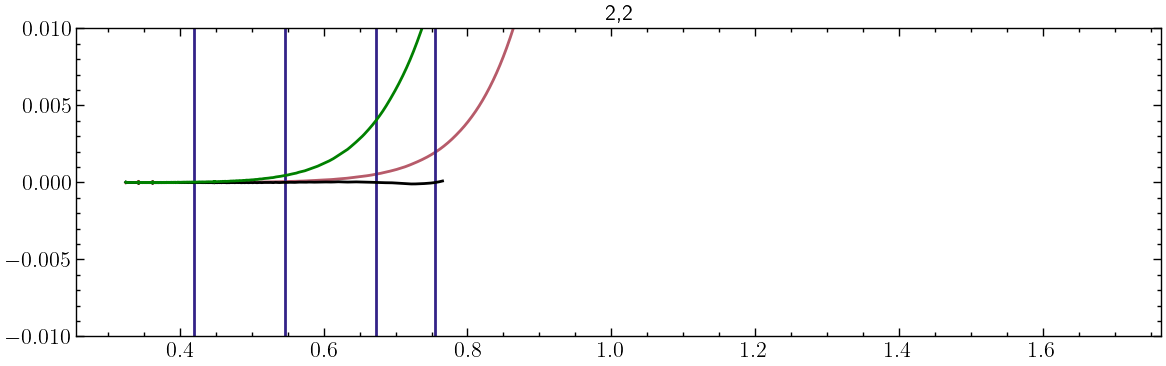

In [83]:
plt.figure(figsize=(14, 4))
plt.plot(x_ref_theta, y_diffs[2,2].mean(0), color='C0', label='mean')
plt.plot(x_ref_theta, y_diffs[2,2].T, c='k', alpha=0.1);
plt.fill_between(x_ref_theta, y1=y_diffs[2,2].min(0), y2=y_diffs[2,2].max(0), color='C0', alpha=0.2, label='uncert')
for v in collocation_points_theta[0]:
    plt.axvline(v, c='C1')
# plt.xlim(-1000, 100)
# plt.ylim(-0.1,0.1)
plt.ylim(-0.01,0.01)
plt.title('2,2')

plt.plot(insfit.x_theta, insfit.y-yhat, c='k')
plt.plot(insfit.x_theta, insfit.y-insfit.omega_pn, c='g')

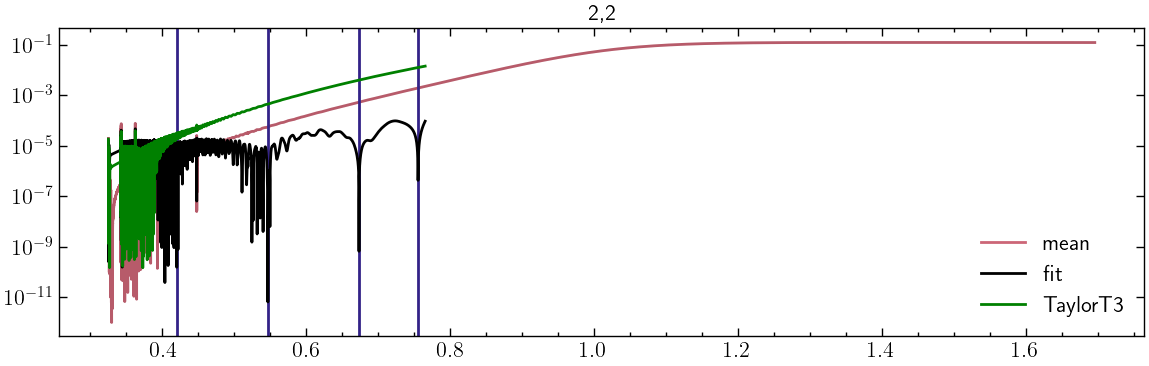

In [84]:
plt.figure(figsize=(14, 4))
plt.plot(x_ref_theta, np.abs(y_diffs[2,2].mean(0)), color='C0', label='mean')
plt.plot(x_ref_theta, np.abs(y_diffs[2,2].T), c='k', alpha=0.1);
for v in collocation_points_theta[0]:
    plt.axvline(v, c='C1')
# plt.xlim(-1000, 100)
# plt.ylim(-0.1,0.1)
# plt.ylim(-0.01,0.01)
plt.title('2,2')

plt.plot(insfit.x_theta, np.abs(insfit.y-yhat), c='k', label='fit')
plt.plot(insfit.x_theta, np.abs(insfit.y-insfit.omega_pn), c='g', label='TaylorT3')
plt.yscale("log")
plt.legend()

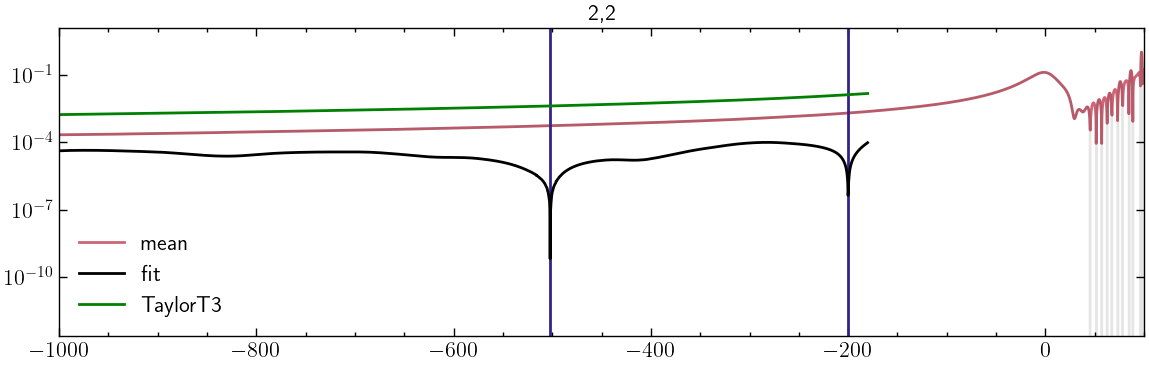

In [85]:
plt.figure(figsize=(14, 4))
plt.plot(x_ref, np.abs(y_diffs[2,2].mean(0)), color='C0', label='mean')
plt.plot(x_ref, y_diffs[2,2].T, c='k', alpha=0.1);
for v in collocation_points_M[0]:
    plt.axvline(v, c='C1')
plt.xlim(-1000, 100)
# plt.ylim(-0.1,0.1)
# plt.ylim(-0.01,0.01)
plt.title('2,2')

plt.plot(insfit.x, np.abs(insfit.y-yhat), c='k', label='fit')
plt.plot(insfit.x, np.abs(insfit.y-insfit.omega_pn), c='g', label='TaylorT3')
plt.yscale("log")
plt.legend()
plt.axvspan(hyb_win1, hyb_win2, color="r", alpha=0.1, label="hybridisation window")

# save hybrid data to h5 file

In [86]:
asdfljka

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 asdfljka                                                                                     │
│   2                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'asdfljka' is not defined

In [ ]:
import h5py
import pathlib

In [ ]:
def create_hybrid_h5(output_dir, wf_name, waveform: prim.waveform.Waveform, metadata, is_reference:bool, output_dir_exist_ok=True):
    output_dir = pathlib.Path(output_dir)
    output_dir.mkdir(exist_ok=output_dir_exist_ok)
    filename = f"{wf_name}.h5"
    with h5py.File(output_dir / filename, 'w') as f:
        f.create_dataset("times", data=waveform.times)
        for l,m in waveform.hlms.keys():
            f.create_dataset(f"hlm_l{l}_m{m}", data=waveform.hlms[(l,m)])

        f.attrs['is_reference'] = is_reference
        f.attrs['q'] = metadata['q']
        f.attrs['chi1z'] = metadata['chi1z']
        f.attrs['chi2z'] = metadata['chi2z']
        f.attrs['sxs_sim_name'] = str(metadata['sxs_sim_name'])
        f.attrs['approximant'] = metadata['approximant']
        f.attrs['modes'] = list(waveform.hlms.keys())

In [ ]:
output_dir = "test_hyb_output_dir"
ref_hyb = metadata_hybrids['reference_hybrid']
for k in wf_hybrids.keys():
    wf_name = k
    wf_name = wf_name.replace(':','_').replace('/','-')
    wf = wf_hybrids[k]
    metadata = metadata_hybrids['hybrids_metadatas'][k]
    if k == ref_hyb:
        is_reference = True
    else:
        is_reference = False

    print(f"creating hybrid h5 file: {k}")
    create_hybrid_h5(output_dir, wf_name, wf, metadata, is_reference)

In [ ]:
!ls test_hyb_output_dir/

In [ ]:
!du -sch test_hyb_output_dir/*

In [ ]:
# perhaps I should use something like romspline to compress... or the sxs code

In [ ]:
list(pathlib.Path('test_hyb_output_dir/').glob("*"))[0]

In [ ]:
f = h5py.File(list(pathlib.Path('test_hyb_output_dir/').glob("*"))[0], 'r')

In [ ]:
list(f.attrs.items())

In [ ]:
f.keys()

In [ ]:
f['hlm_l2_m2']

In [ ]:
f['hlm_l2_m2'][:]

In [ ]:
plt.plot(f['times'][:], f['hlm_l2_m2'][:].real)

In [ ]:
'hlms_l2_m2'.split('_')

In [ ]:
f.close()

In [ ]:
!ls